In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

# sklean imports 
from sklearn.linear_model import *
from sklearn.ensemble import *

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier

import xgboost


from sklearn.model_selection import *

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA


from sklearn.metrics import *
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [2]:
# Set colour palette 
'''
greys = ['#767676', '#b3b3b3', '#212121']
sns.set_palette(sns.color_palette(greys))
'''
sns.set_style("white")

<br>

# Data Import 

In [3]:
train_df_raw = pd.read_csv('Project2_Train.csv')
display(train_df_raw.head())

test_df_raw = pd.read_csv('Project2_Test.csv')
display(test_df_raw.head())

,Unnamed: 0,id,Gender,Age,Region_Code,Age.1,VehicleDamage,Premium,Vintage,Response,Mystery
0,1,319654,Male,22,46,< 1 Year,Yes,29719,79,0,M3
1,2,298528,Female,40,28,1-2 Year,Yes,29645,99,0,M20
2,3,120858,Male,25,28,1-2 Year,Yes,35996,266,1,M3
3,4,234326,Female,25,29,< 1 Year,No,56899,25,0,M20
4,5,372307,Female,70,28,1-2 Year,No,47452,189,0,M17


,Unnamed: 0,id,Gender,Age,Region_Code,Age.1,Damage,Premium,Vintage,Response,Mystery
0,1,121588,Female,24,28,< 1 Year,Yes,2630,271,0,M1
1,2,44234,Male,23,28,1-2 Year,Yes,40523,244,0,M20
2,3,65903,Male,51,28,1-2 Year,Yes,40951,33,0,M7
3,4,264705,Female,31,46,< 1 Year,Yes,42505,191,0,M9
4,5,364309,Male,51,46,1-2 Year,Yes,38232,151,1,M2


In [4]:
train_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     10000 non-null  int64 
 1   id             10000 non-null  int64 
 2   Gender         10000 non-null  object
 3   Age            10000 non-null  int64 
 4   Region_Code    10000 non-null  int64 
 5   Age.1          10000 non-null  object
 6   VehicleDamage  10000 non-null  object
 7   Premium        10000 non-null  int64 
 8   Vintage        10000 non-null  int64 
 9   Response       10000 non-null  int64 
 10  Mystery        10000 non-null  object
dtypes: int64(7), object(4)
memory usage: 859.5+ KB


In [5]:
train_df = train_df_raw.copy()

# Make male = 1 female = 0 
train_df['Gender'] = train_df['Gender'].apply(lambda x: 1 if (x == 'Male') else 0)

# Vehicle damage yes = 1 
train_df['VehicleDamage'] = train_df['VehicleDamage'].apply(lambda x: 1 if (x == 'Yes') else 0)

# Dummify Age.1 
train_df = pd.get_dummies(train_df, columns=['Age.1'])
train_df = pd.get_dummies(train_df, columns=['Region_Code'])


# Drop mystery 
train_df = train_df.drop('Mystery', axis=1)
train_df = train_df.drop('Unnamed: 0', axis=1)

train_df

,id,Gender,Age,VehicleDamage,Premium,Vintage,Response,Age.1_1-2 Year,Age.1_< 1 Year,Age.1_> 2 Years,Region_Code_3,Region_Code_8,Region_Code_11,Region_Code_15,Region_Code_28,Region_Code_29,Region_Code_30,Region_Code_41,Region_Code_46,Region_Code_50
0,319654,1,22,1,29719,79,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,298528,0,40,1,29645,99,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,120858,1,25,1,35996,266,1,1,0,0,0,0,0,0,1,0,0,0,0,0
3,234326,0,25,0,56899,25,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,372307,0,70,0,47452,189,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,93671,1,28,1,2630,31,1,0,1,0,0,0,0,0,0,0,0,1,0,0
9996,366284,1,43,1,28945,66,0,0,0,1,0,0,0,0,0,0,0,0,1,0
9997,369037,0,46,0,2630,286,0,1,0,0,0,0,0,0,1,0,0,0,0,0
9998,268384,0,21,0,23031,155,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [6]:
test_df = test_df_raw.copy()

# Make male = 1 female = 0 
test_df['Gender'] = test_df['Gender'].apply(lambda x: 1 if (x == 'Male') else 0)

# Vehicle damage yes = 1 
test_df['Damage'] = test_df['Damage'].apply(lambda x: 1 if (x == 'Yes') else 0)

# Dummify Age.1 
test_df = pd.get_dummies(test_df, columns=['Age.1'])
test_df = pd.get_dummies(test_df, columns=['Region_Code'])

# Drop mystery 
test_df = test_df.drop('Mystery', axis=1)
test_df = test_df.drop('Unnamed: 0', axis=1)

test_df = test_df.rename({'Damage': 'VehicleDamage'}, axis=1)

test_df

,id,Gender,Age,VehicleDamage,Premium,Vintage,Response,Age.1_1-2 Year,Age.1_< 1 Year,Age.1_> 2 Years,Region_Code_3,Region_Code_8,Region_Code_11,Region_Code_15,Region_Code_28,Region_Code_29,Region_Code_30,Region_Code_41,Region_Code_46,Region_Code_50
0,121588,0,24,1,2630,271,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,44234,1,23,1,40523,244,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,65903,1,51,1,40951,33,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,264705,0,31,1,42505,191,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,364309,1,51,1,38232,151,1,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,123293,1,49,0,33720,161,0,1,0,0,0,0,0,0,1,0,0,0,0,0
9996,110877,1,43,1,23176,171,1,1,0,0,0,0,0,0,0,0,0,0,1,0
9997,207348,1,36,0,2630,16,0,1,0,0,0,0,1,0,0,0,0,0,0,0
9998,89084,1,36,1,26275,230,0,1,0,0,0,0,0,0,0,0,0,0,1,0


<br>

# Data Exploration 

In [7]:
train_df.isnull().sum()

id                 0
Gender             0
Age                0
VehicleDamage      0
Premium            0
Vintage            0
Response           0
Age.1_1-2 Year     0
Age.1_< 1 Year     0
Age.1_> 2 Years    0
Region_Code_3      0
Region_Code_8      0
Region_Code_11     0
Region_Code_15     0
Region_Code_28     0
Region_Code_29     0
Region_Code_30     0
Region_Code_41     0
Region_Code_46     0
Region_Code_50     0
dtype: int64

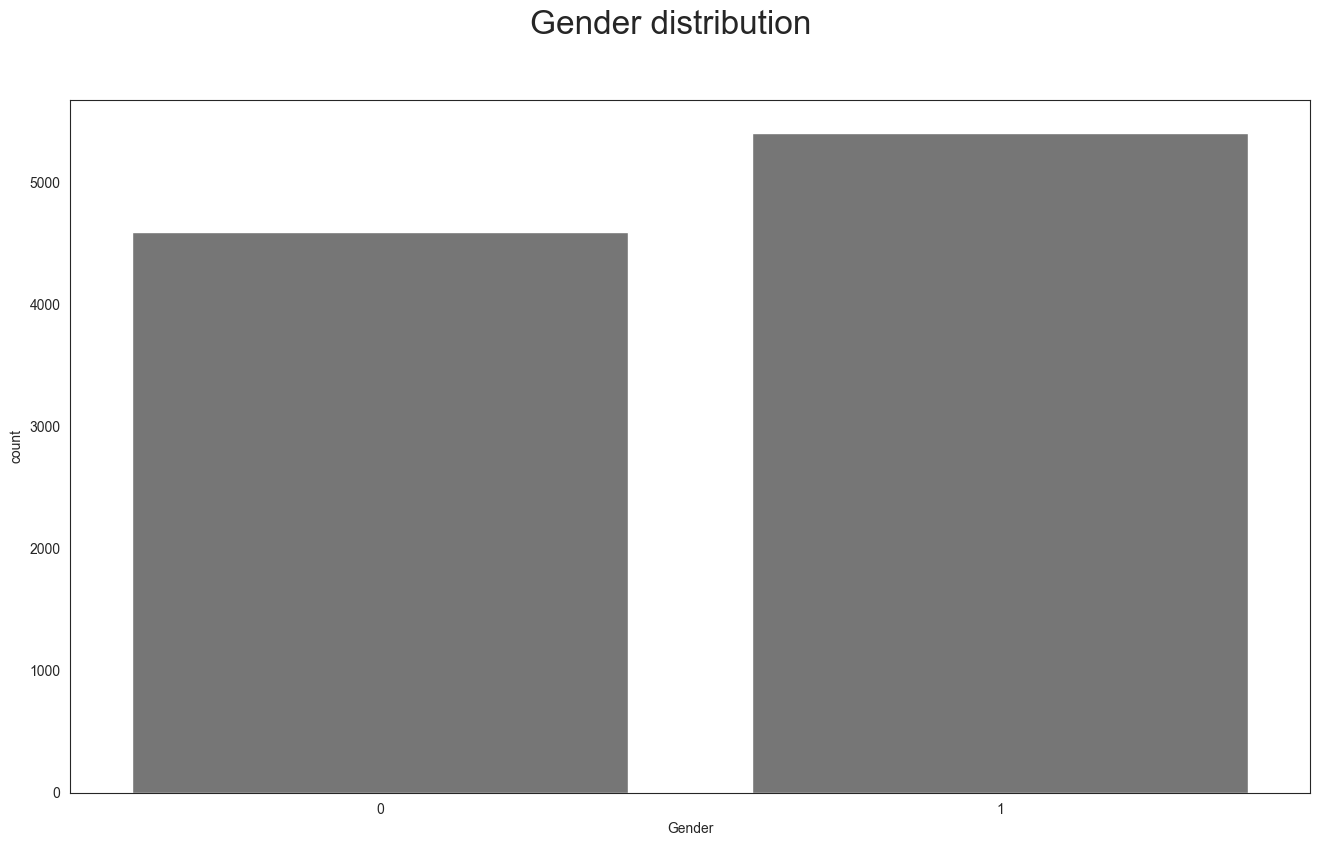

In [8]:
fig = plt.figure(figsize=(16,9))
fig = sns.countplot(data=train_df, x='Gender', palette=['#767676', '#767676'])
plt.suptitle('Gender distribution', fontsize = 24)
plt.show()

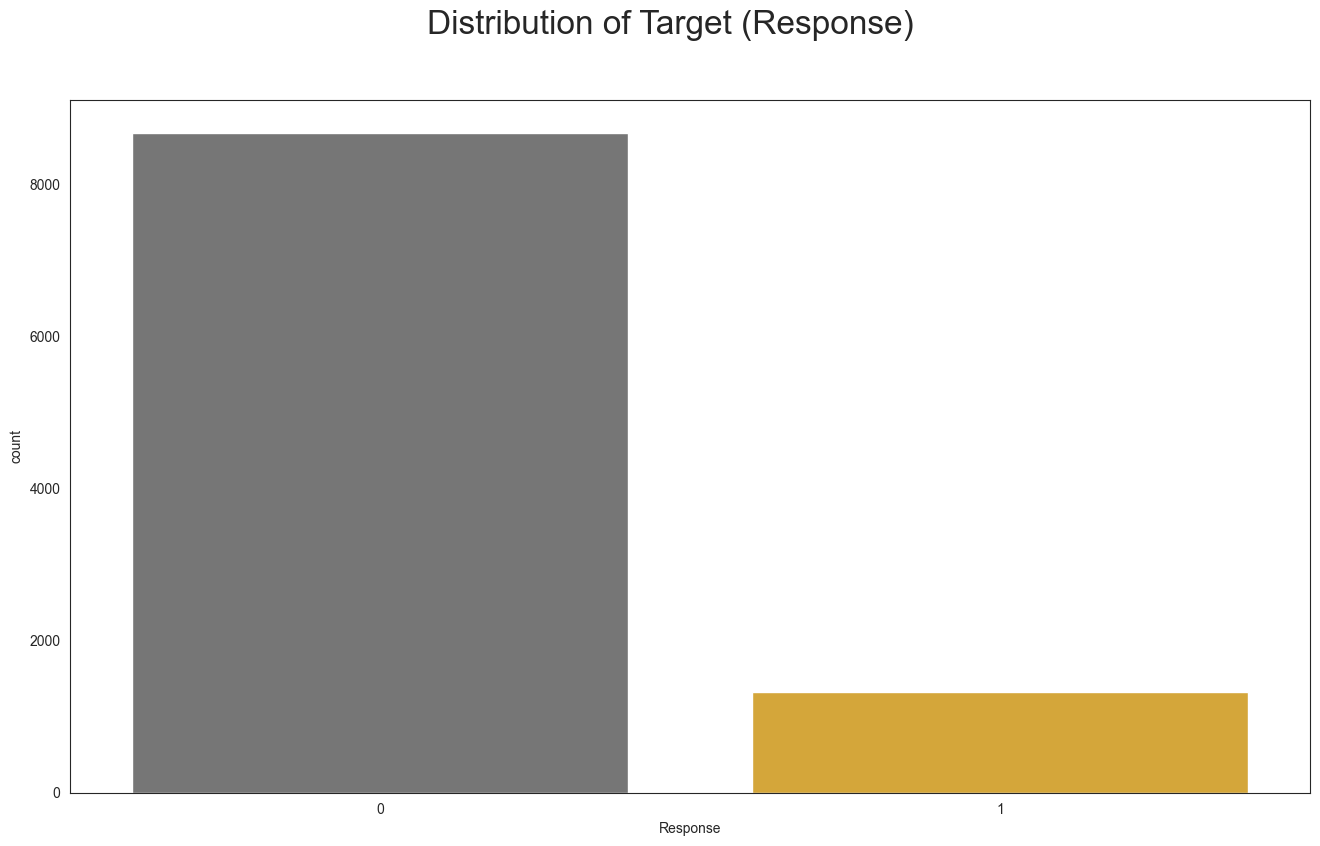

In [9]:
fig = plt.figure(figsize=(16,9))
fig = sns.countplot(data=train_df, x='Response', palette=['#767676', '#edb021'])
plt.suptitle('Distribution of Target (Response)', fontsize = 24)
plt.show()

In [10]:
'''
temp = ['Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage', 'Response']

sns.pairplot(data=train_df.loc[:,temp])
'''

"\ntemp = ['Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage', 'Response']\n\nsns.pairplot(data=train_df.loc[:,temp])\n"

<br>

# Functions

We are goign to use the threshold value from the benefit strucutre, which will be discussed later 

In [11]:
THRESHOLD = .1

In [12]:
def data_generation(df, features, target):
    # Data set creation 
    df_temp = df.copy()
    df_temp = df_temp.loc[:, features]

    # Lets take a smaller sample for now 
    y = df_temp[target]
    X = df_temp.drop(target, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
    return([X_train, X_test, y_train, y_test])


#--------------------------------------------------------------------------------------------------


def classification_stats(X_train, y_train, X_test, y_test, model_used, model_name):
    
    y_pred = (model_used.predict_proba(X_test)[:,1]>=THRESHOLD).astype(int)

    print("The Training Accuracy is: ", model_used.score(X_train, y_train))
    print("The Testing Accuracy is: ", model_used.score(X_test, y_test))
    print(classification_report(y_test, y_pred, target_names=['Bad Response', 'Good Response']))

    #--------------------------------------------------------------------------------------------------
    
    y_pred_proba = model_used.predict_proba(X_test)[:,1]
    y_pred = (y_pred_proba > THRESHOLD).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=model_used.classes_)
    
    fig = sns.heatmap(cm_norm, annot=True, cbar=False, cmap='Blues', annot_kws={"fontsize":16})
    fig.set_xlabel('Predicted labels')
    fig.set_ylabel('True labels')
    fig.set_title('Confusion Matrix when Threshold = ' + str(THRESHOLD*100) + '%')
    fig.set_ylim([0,2])

    plt.savefig('temp.png', transparent=True, dpi=600)
    plt.show()

    #--------------------------------------------------------------------------------------------------
    fig = plt.figure(figsize=(16,9))
    fig = sns.lineplot([0,1], [0,1], label='No Skill', color='#3f7f93')

    #--------------------------------------------------------------------------------------------------
    # Test performance
    y_pred = model_used.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    auc = roc_auc_score(y_test, y_pred)
    fig = sns.lineplot(x=fpr, y=tpr, label=f'Validation AUC: {round(auc,3)}', ci=None, color='#edb021')

    #--------------------------------------------------------------------------------------------------
    # Train performance
    y_pred = model_used.predict_proba(X_train)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_train, y_pred)

    auc = roc_auc_score(y_train, y_pred)
    fig = sns.lineplot(x=fpr, y=tpr, label=f'Train AUC: {round(auc,3)}', ci=None, color='#767676')

    #--------------------------------------------------------------------------------------------------
    plt.legend()
    fig.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    plt.suptitle(model_name, fontsize = 24)
    plt.savefig('temp.png', transparent=True)
    plt.show() 
    

#--------------------------------------------------------------------------------------------------

def PRAUC_generator(X_train, y_train, X_test, y_test, model_used, model_name):
    # Training Set
    y_pred_proba = model_used.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    average_precision = average_precision_score(y_test, y_pred_proba)

    plt.figure(figsize = (8,6))
    sns.lineplot(x=recall, y=precision,
                 label = 'PRAUC: %0.3f' % average_precision, color='#edb021')
    baseline = len(y_test[y_test==1]) / len(y_test)
    sns.lineplot(x=[0,1], y=[baseline, baseline], label = f'Baseline: {round(baseline, 3)}', color='#767676')
    plt.legend(loc = 'upper right')
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.yticks(np.arange(0, 1, step=0.1))
    plt.xticks(np.arange(0, 1, step=0.1))
    plt.title(f'{model_name} Precision-Recall Curve [Training]')
    plt.show()
    
    
def feature_selection_results(X_train, model_used, model_name):
    importance = model_used.named_steps["mdl"].coef_[0].tolist()
    f = X_train.columns
    temp = pd.DataFrame({'features':f, 'values':importance})
    temp = temp.sort_values('values', ascending=False, key=abs)

    display(temp)

    fig = plt.figure(figsize=(16,9))
    plt.suptitle(f'{model_name} Importances', fontsize = 24)
    sns.barplot(data=temp, x='values', y='features', color='#767676')
    plt.show()

 <br>

 <br>

# Choice of Performance Metric<a id="section5"></a>

- **TP**: Correctly detecting a popular song [Highest Significance]
- **FP**: Wrongly detected a popular song [High Significance]
- **FN**: Fail to detect a popular song [Moderate Significance]
- **TN**: Correctly detecting an unpopular song [Low Significance]


Performance metric should prioritise maximising TP and minimising FP. If possible, FN should be minimised as well. 

Based on the above classfication of significance, the **Precision score (TP/TP+FP)** should be as high as possible, correctly **predicting more positives** and **falsely predicting less positives**. 

However, we should not only use Precision as the evaluation metric as FNs should are of moderate significance. In order to **minimise FNs, the Recall score should be as higher as possible**.

In order to maximise Recall and Precision, **Precision-Recall Area Under Curve (PR AUC)** should be the main evaluation metric.

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/

https://medium.com/@douglaspsteen/precision-recall-curves-d32e5b290248

https://glassboxmedicine.com/2019/03/02/measuring-performance-auprcz


 <br>

# Logistic Regression 

The Training Accuracy is:  0.8705970149253731
The Testing Accuracy is:  0.860909090909091
               precision    recall  f1-score   support

 Bad Response       0.99      0.57      0.72      2841
Good Response       0.27      0.98      0.42       459

     accuracy                           0.62      3300
    macro avg       0.63      0.77      0.57      3300
 weighted avg       0.89      0.62      0.68      3300



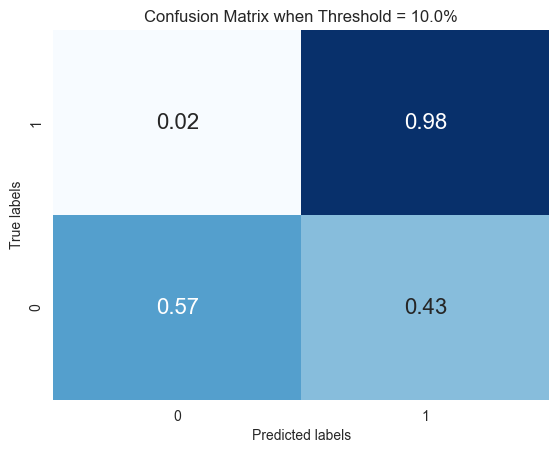

C:\Users\seanl\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


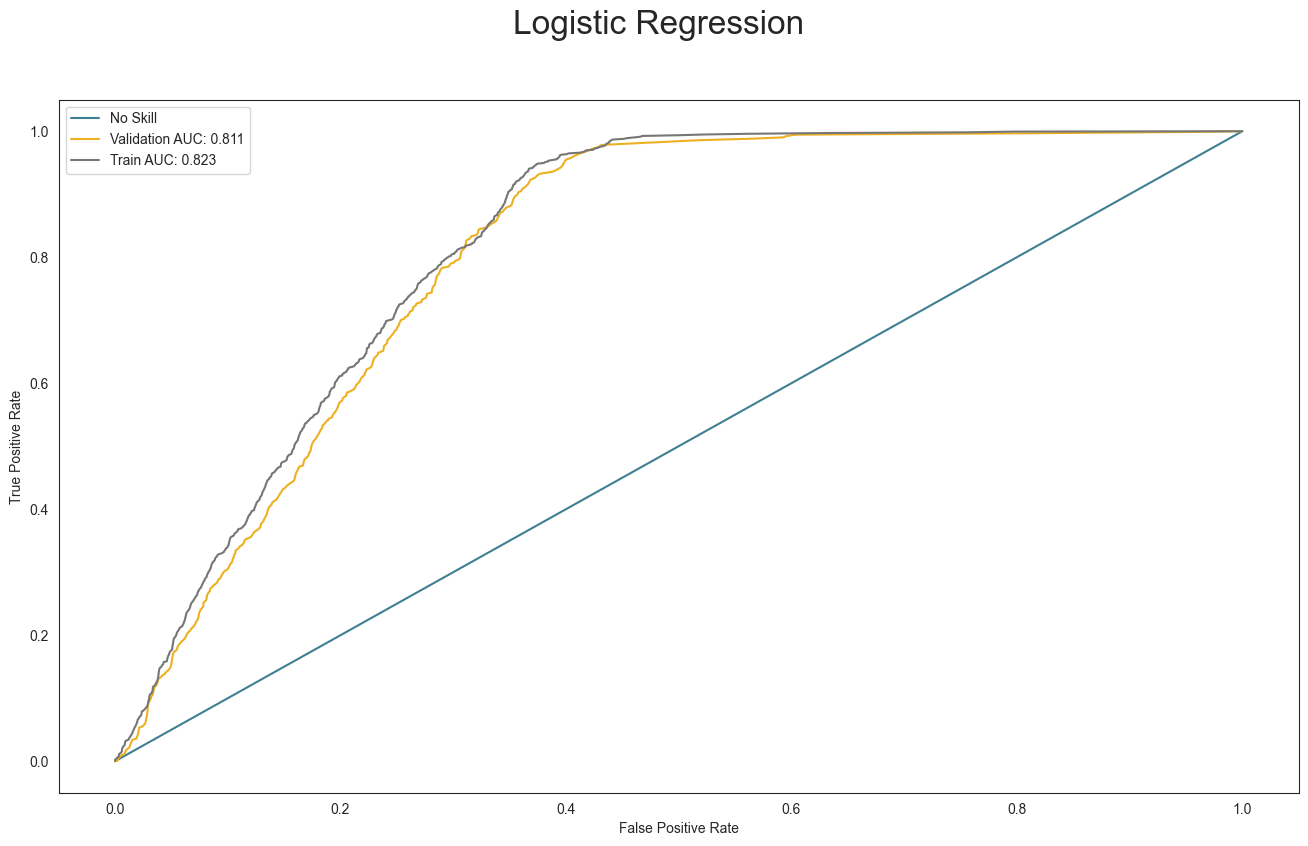

CPU times: total: 1.25 s
Wall time: 1.27 s


In [13]:
%%time
features = ['Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage',
            'Response', 'Age.1_1-2 Year', 'Age.1_< 1 Year', 'Age.1_> 2 Years', 'Region_Code_3',
            'Region_Code_8', 'Region_Code_11', 'Region_Code_15', 'Region_Code_28', 'Region_Code_29',
            'Region_Code_30', 'Region_Code_41', 'Region_Code_46', 'Region_Code_50']

X_train, X_val, y_train, y_val = data_generation(train_df, features, 'Response')

#--------------------------------------------------------------------------------------------------
logreg = Pipeline(steps=[("scaler", StandardScaler()),
                         ("mdl", LogisticRegression(penalty='none'))])

logreg.fit(X_train, y_train)

classification_stats(X_train, y_train, X_val, y_val, logreg, 'Logistic Regression')

### PRAUC

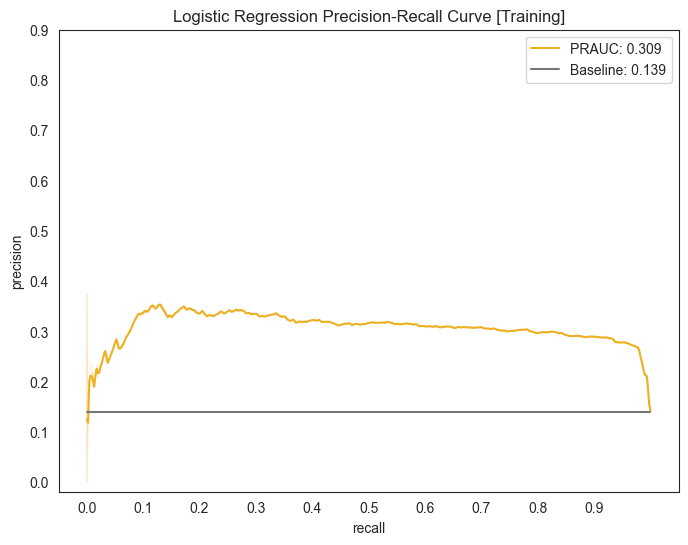

In [14]:
PRAUC_generator(X_train, y_train, X_val, y_val, logreg, 'Logistic Regression')

### Feature importance

,features,values
2,VehicleDamage,2.105192
1,Age,-0.284851
6,Age.1_< 1 Year,-0.267877
5,Age.1_1-2 Year,0.207786
11,Region_Code_15,-0.143710
7,Age.1_> 2 Years,0.127756
16,Region_Code_46,-0.122422
15,Region_Code_41,0.106727
9,Region_Code_8,-0.094751
12,Region_Code_28,0.092953


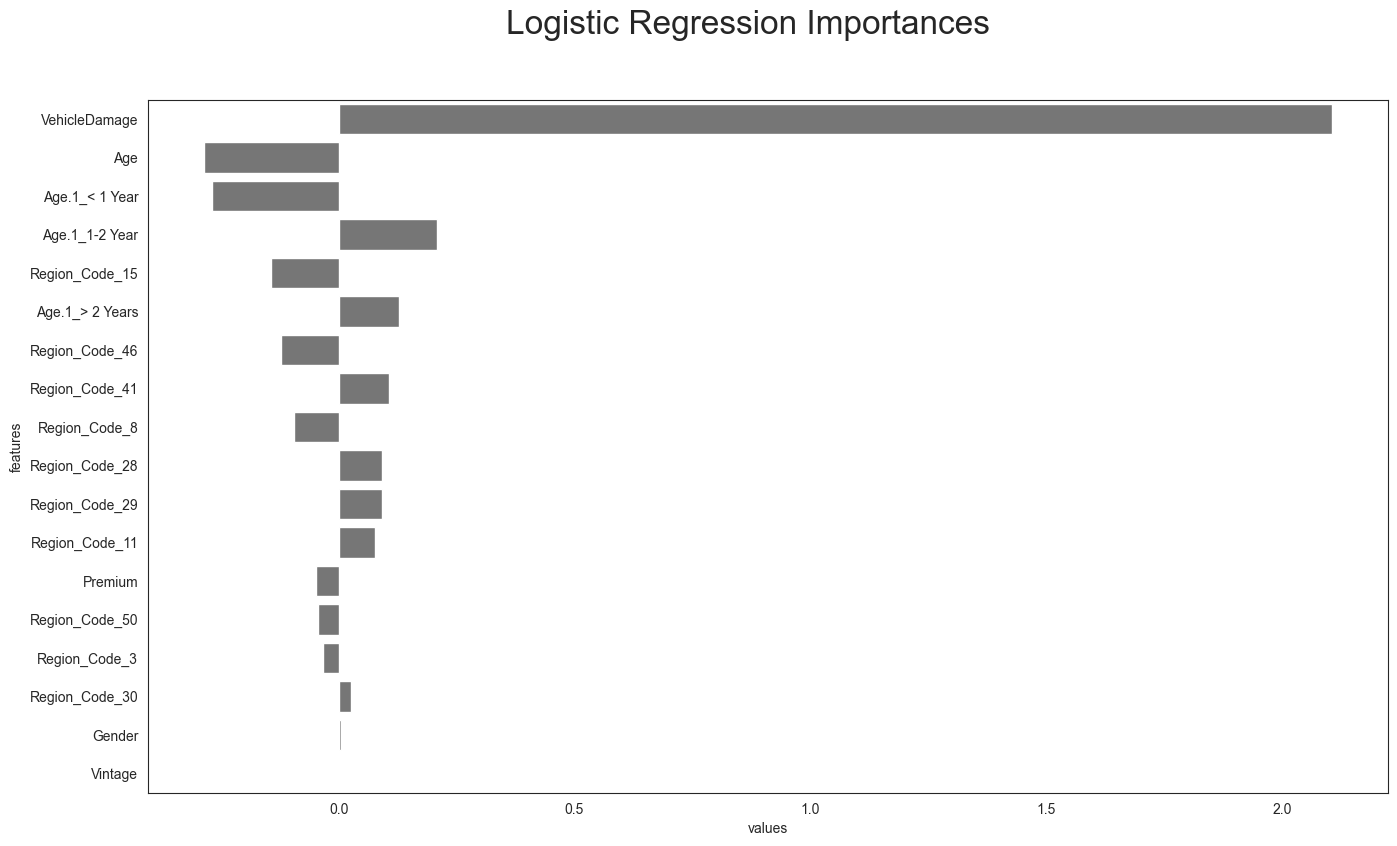

In [15]:
feature_selection_results(X_train, logreg, 'Logistic Regression')

<br>

<br>

# Choosing a Complex Model

In [16]:
%%time
results = []
names = []

#--------------------------------------------------------------------------------------------------

temp = []
models = []
models.append(('Logistic', LogisticRegression()))

models.append(('Random Forest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))

models.append(('K Neigbor Classifier', KNeighborsClassifier()))

models.append(('Support Vector Classifier', SVC()))
models.append(('Support Vector Machines', SVC(kernel = 'rbf')))

models.append(('MLP',  MLPClassifier(alpha=1, max_iter=1000)))

models.append(('Ada boost', AdaBoostClassifier()))
models.append(('Gradient boosting', GradientBoostingClassifier()))

models.append(('Bagging classifier', BaggingClassifier()))

#--------------------------------------------------------------------------------------------------
# VOTING
logistic = LogisticRegression()
svc = SVC()
svm = SVC(kernel = 'rbf')
mlp = MLPClassifier(alpha=1, max_iter=1000)

list_models = [('logistic', logistic),
               ('svc', svc), 
               ('svm', svm),
               ('mlp', mlp)
              ]
models.append(('Voting regressor', VotingClassifier(estimators=list_models)))

for name, model in models:
    mdl = Pipeline(steps=[("scaler", StandardScaler()),
                          ("mdl", model)])
    cv_results = cross_val_score(mdl, X_train, y_train, cv=2, scoring='accuracy', n_jobs=-1)
    names.append(name)
    temp.append([name, abs(cv_results.mean()), cv_results.std()])

mdl_performance = pd.DataFrame(temp, columns=['model', 'Accuracy', 'Accuracy_std'])
mdl_performance = mdl_performance.sort_values('Accuracy', ascending=False)
mdl_performance

CPU times: total: 172 ms
Wall time: 19.4 s


,model,Accuracy,Accuracy_std
0,Logistic,0.870746,0.000000
4,Support Vector Classifier,0.870597,0.000149
5,Support Vector Machines,0.870597,0.000149
10,Voting regressor,0.870597,0.000149
6,MLP,0.870448,0.000000
7,Ada boost,0.867612,0.001343
8,Gradient boosting,0.866716,0.000149
1,Random Forest,0.856119,0.002090
9,Bagging classifier,0.848358,0.004776
3,K Neigbor Classifier,0.845522,0.002537


<br>

<br>

# Gradient Boost No Hyperparameter Tuning

The Training Accuracy is:  0.8749253731343284
The Testing Accuracy is:  0.8581818181818182
               precision    recall  f1-score   support

 Bad Response       0.99      0.61      0.76      2841
Good Response       0.28      0.95      0.44       459

     accuracy                           0.66      3300
    macro avg       0.64      0.78      0.60      3300
 weighted avg       0.89      0.66      0.71      3300



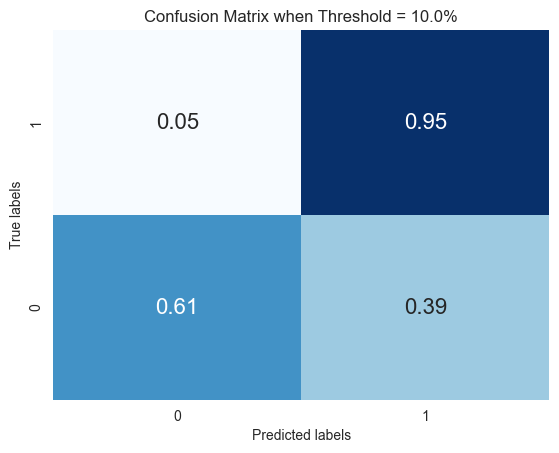

C:\Users\seanl\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


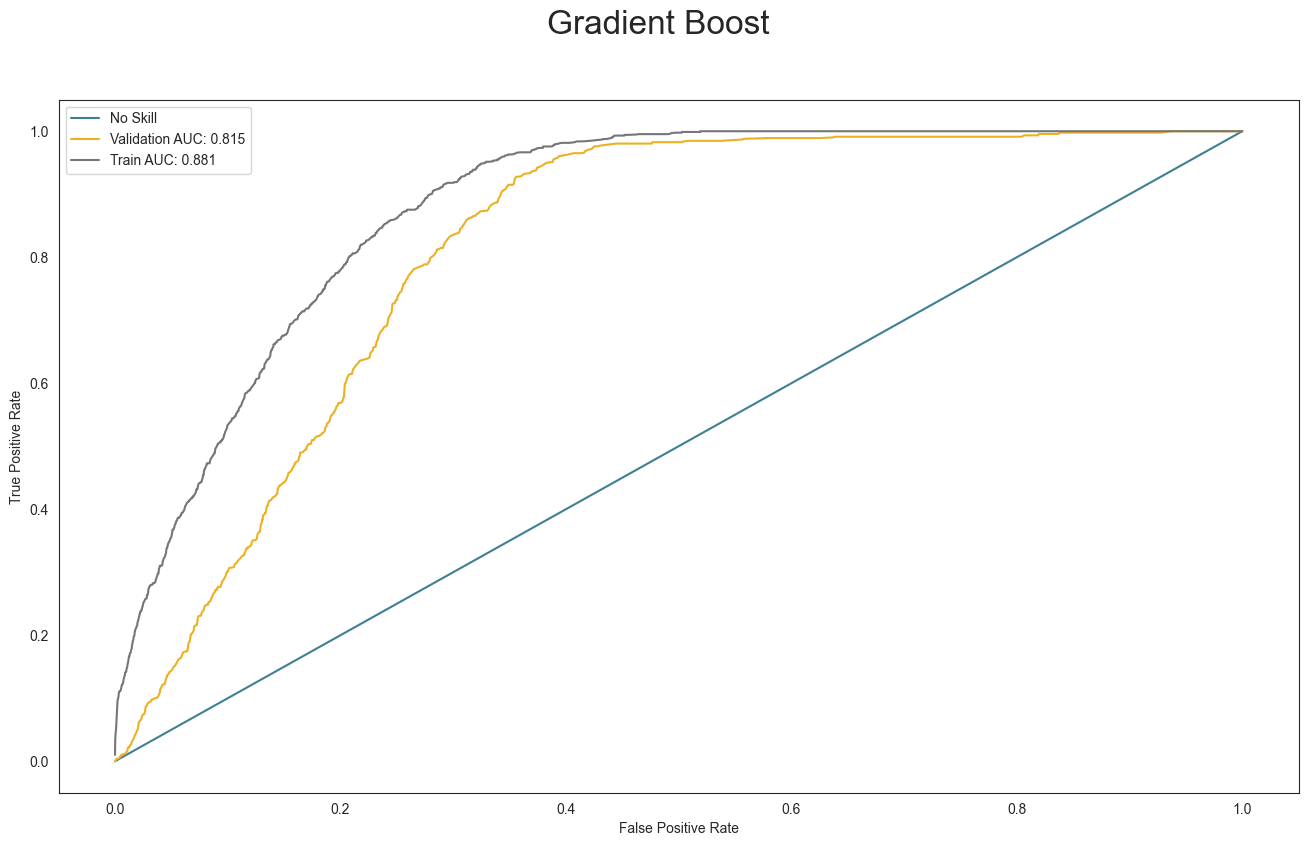

In [17]:
grad_boost = Pipeline(steps=[("scaler", StandardScaler()),
                        ("mdl", GradientBoostingClassifier())])

grad_boost.fit(X_train, y_train)

classification_stats(X_train, y_train, X_val, y_val, grad_boost, 'Gradient Boost')

<br>

# Gradient Boost With Hyperparameter tuning 

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Model Best Params: 
{'mdl__n_estimators': 50}


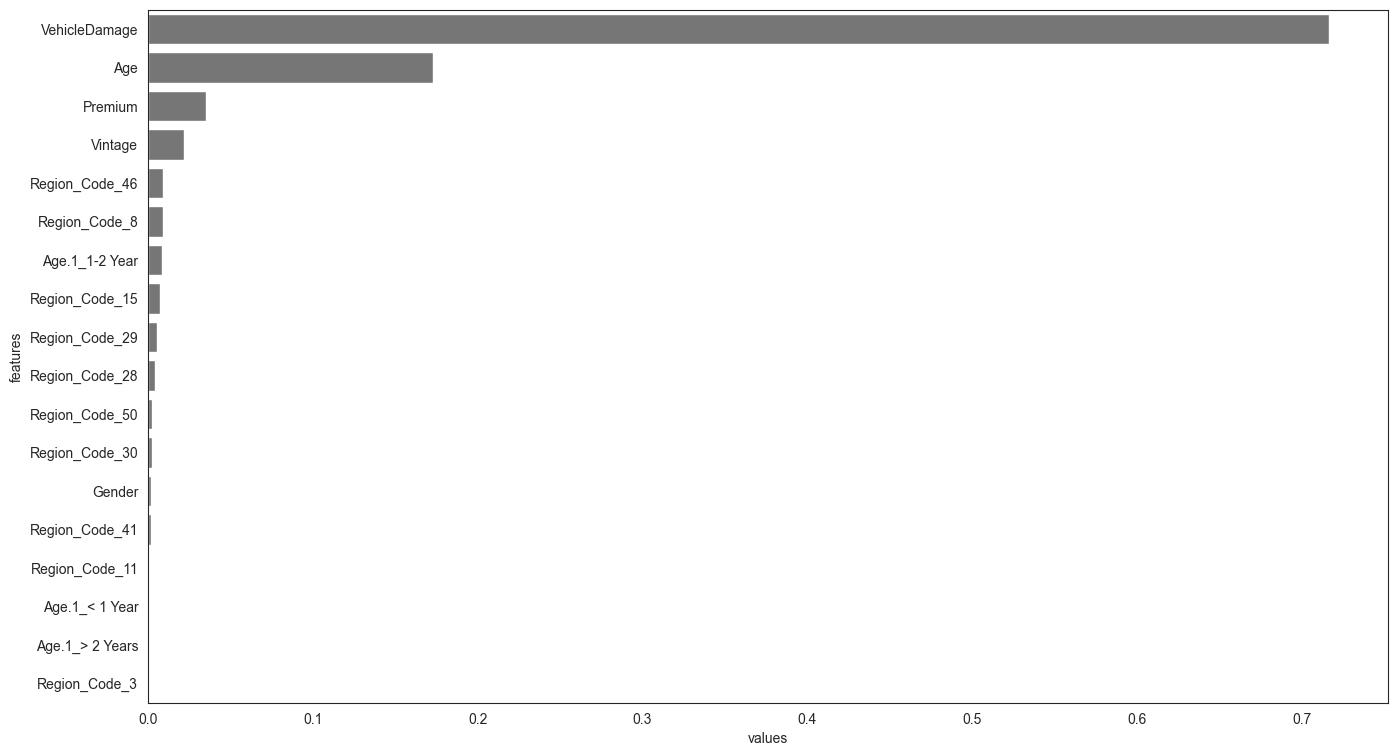

In [18]:
parameters = {
    'mdl__n_estimators':range(50,200,20)
}

grad_boost = Pipeline(steps=[("scaler", StandardScaler()),
                        ("mdl", GradientBoostingClassifier())])

grad_boost_GS = GridSearchCV(estimator=grad_boost, param_grid=parameters, n_jobs=-1, cv=10,
                             scoring='accuracy',error_score=0, return_train_score = True,
                             verbose = 2)

grad_boost_GS.fit(X_train, y_train)

print('Model Best Params: ')
print(grad_boost_GS.best_params_)

importance = grad_boost_GS.best_estimator_.named_steps["mdl"].feature_importances_
f = X_train.columns
temp = pd.DataFrame({'features':f, 'values':importance})
temp = temp.sort_values('values', ascending=False)

fig = plt.figure(figsize=(16,9))
sns.barplot(data=temp, x='values', y='features', color='#767676')
plt.suptitle('Feature importance to check', fontsize = 24)
plt.show()

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Model Best Params: 
{'mdl__max_depth': 5, 'mdl__min_samples_split': 600}


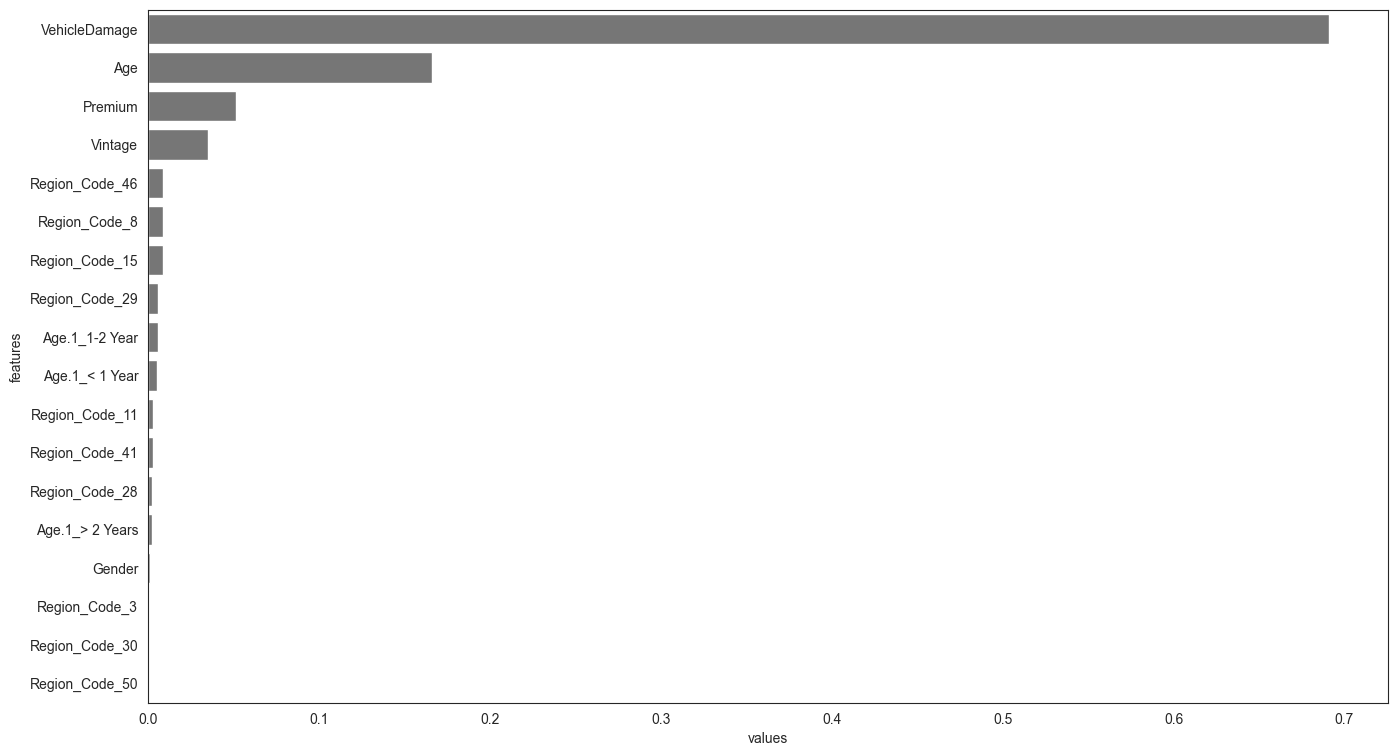

In [19]:
parameters = {
    'mdl__max_depth':range(5,16,2), 
    'mdl__min_samples_split':range(200,1001,200)
}


grad_boost = Pipeline(steps=[("scaler", StandardScaler()),
                        ("mdl", GradientBoostingClassifier(n_estimators=50))])

grad_boost_GS = GridSearchCV(estimator=grad_boost, param_grid=parameters, n_jobs=-1, cv=10,
                             scoring='accuracy',error_score=0, return_train_score = True,
                             verbose = 2)

grad_boost_GS.fit(X_train, y_train)

print('Model Best Params: ')
print(grad_boost_GS.best_params_)

importance = grad_boost_GS.best_estimator_.named_steps["mdl"].feature_importances_
f = X_train.columns
temp = pd.DataFrame({'features':f, 'values':importance})
temp = temp.sort_values('values', ascending=False)

fig = plt.figure(figsize=(16,9))
sns.barplot(data=temp, x='values', y='features', color='#767676')
plt.suptitle('Feature importance to check', fontsize = 24)
plt.show()

The Training Accuracy is:  0.8714925373134328
The Testing Accuracy is:  0.860909090909091
               precision    recall  f1-score   support

 Bad Response       0.99      0.60      0.75      2841
Good Response       0.28      0.96      0.44       459

     accuracy                           0.65      3300
    macro avg       0.64      0.78      0.59      3300
 weighted avg       0.89      0.65      0.71      3300



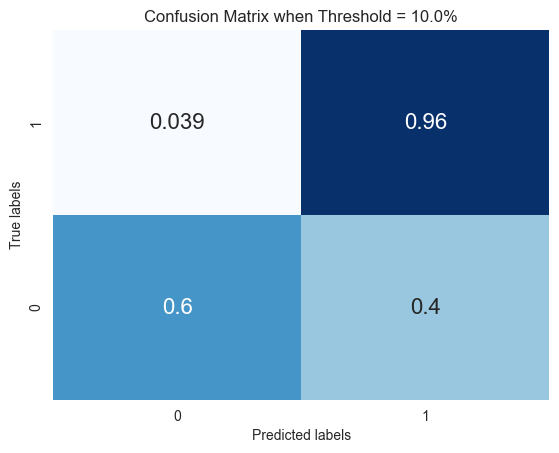

C:\Users\seanl\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


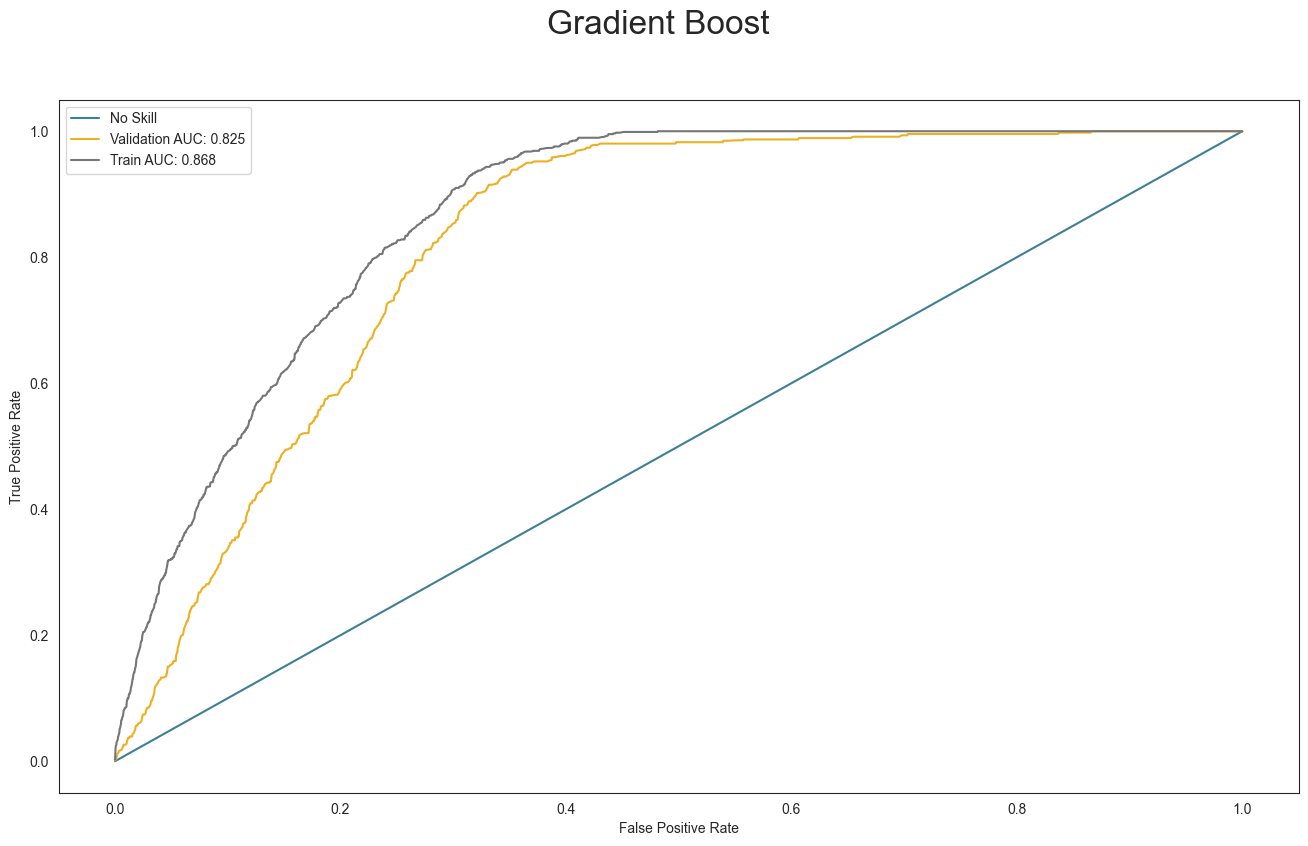

In [20]:
classification_stats(X_train, y_train, X_val, y_val, grad_boost_GS, 'Gradient Boost')

In [21]:
# parameters to hyper tune
print('Gradient Boost Params: ')
grad_boost_GS.get_params()

Gradient Boost Params: 


{'cv': 10,
 'error_score': 0,
 'estimator__memory': None,
 'estimator__steps': [('scaler', StandardScaler()),
  ('mdl', GradientBoostingClassifier(n_estimators=50))],
 'estimator__verbose': False,
 'estimator__scaler': StandardScaler(),
 'estimator__mdl': GradientBoostingClassifier(n_estimators=50),
 'estimator__scaler__copy': True,
 'estimator__scaler__with_mean': True,
 'estimator__scaler__with_std': True,
 'estimator__mdl__ccp_alpha': 0.0,
 'estimator__mdl__criterion': 'friedman_mse',
 'estimator__mdl__init': None,
 'estimator__mdl__learning_rate': 0.1,
 'estimator__mdl__loss': 'log_loss',
 'estimator__mdl__max_depth': 3,
 'estimator__mdl__max_features': None,
 'estimator__mdl__max_leaf_nodes': None,
 'estimator__mdl__min_impurity_decrease': 0.0,
 'estimator__mdl__min_samples_leaf': 1,
 'estimator__mdl__min_samples_split': 2,
 'estimator__mdl__min_weight_fraction_leaf': 0.0,
 'estimator__mdl__n_estimators': 50,
 'estimator__mdl__n_iter_no_change': None,
 'estimator__mdl__random_stat

### PRAUC

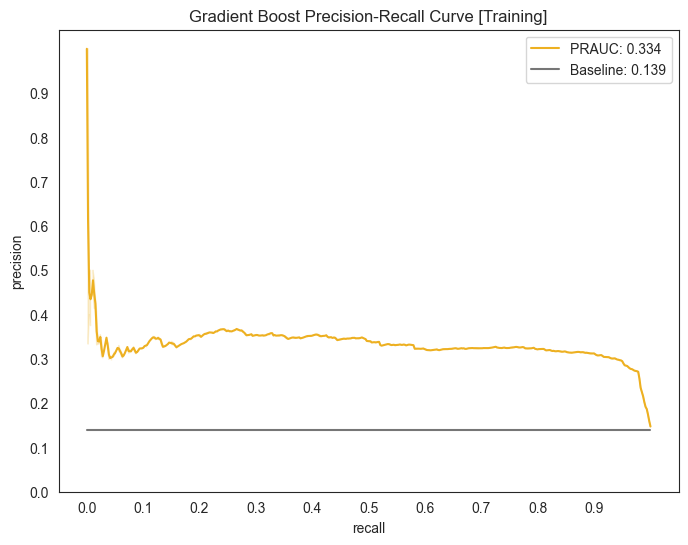

In [22]:
PRAUC_generator(X_train, y_train, X_val, y_val, grad_boost_GS, 'Gradient Boost')

### Feature Importance 

,features,values
2,VehicleDamage,0.690865
1,Age,0.165993
3,Premium,0.051297
4,Vintage,0.034997
16,Region_Code_46,0.008990
9,Region_Code_8,0.008931
11,Region_Code_15,0.008626
13,Region_Code_29,0.006082
5,Age.1_1-2 Year,0.005705
6,Age.1_< 1 Year,0.005487


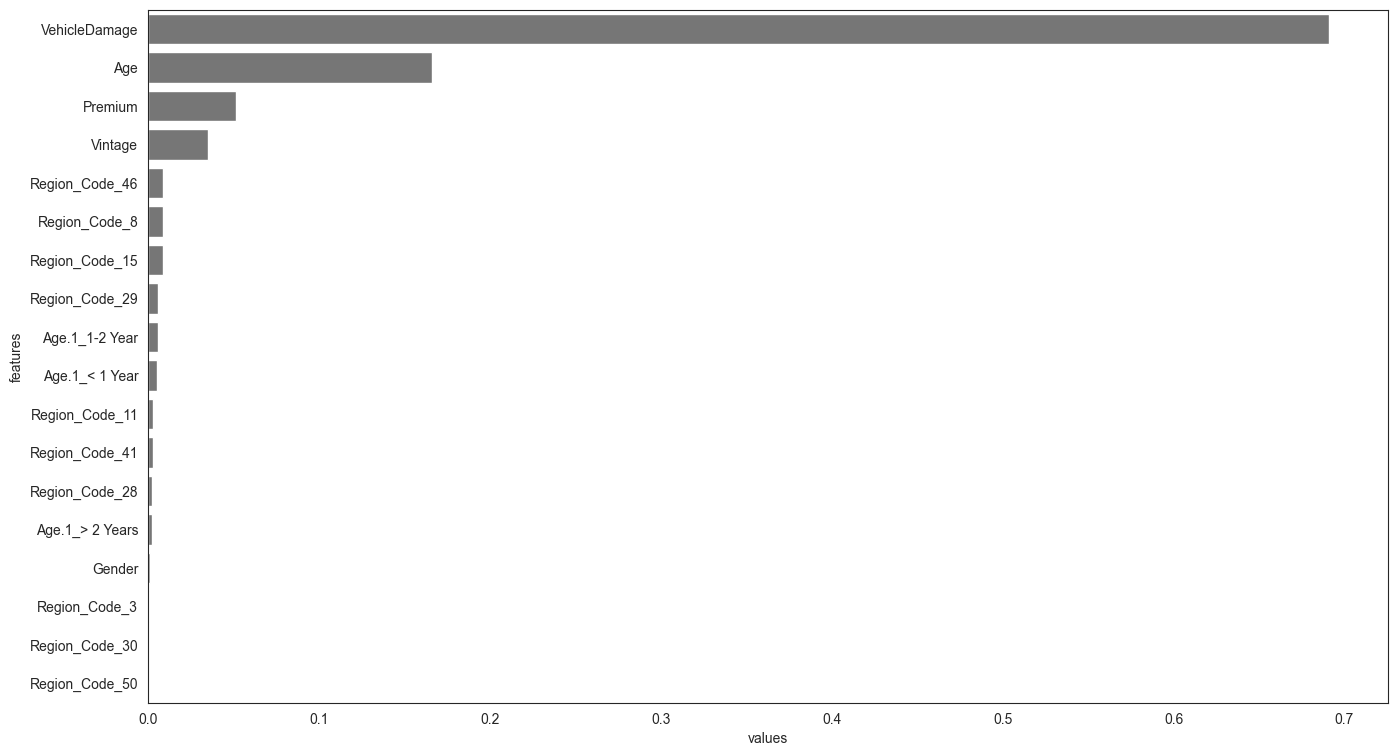

In [23]:
importance = grad_boost_GS.best_estimator_.named_steps["mdl"].feature_importances_
f = X_train.columns
temp = pd.DataFrame({'features':f, 'values':importance})
temp = temp.sort_values('values', ascending=False)


display(temp)

fig = plt.figure(figsize=(16,9))
sns.barplot(data=temp, x='values', y='features', color='#767676')
plt.show()

<br>

# Averaging both Models 

In [45]:
logreg_pred = logreg.predict_proba(X_val)[:,1]
grad_boost_pred = grad_boost_GS.predict_proba(X_val)[:,1]

ave = np.mean( np.array([ logreg_pred, grad_boost_pred ]), axis=0 )
ave

array([0.33728307, 0.00912421, 0.32194334, ..., 0.41880888, 0.2312244 ,
       0.34487109])

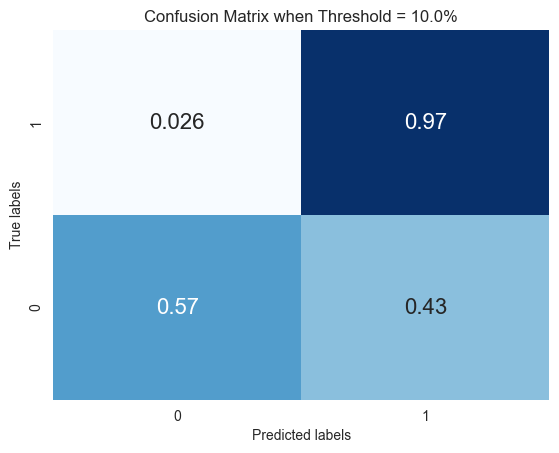

C:\Users\seanl\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


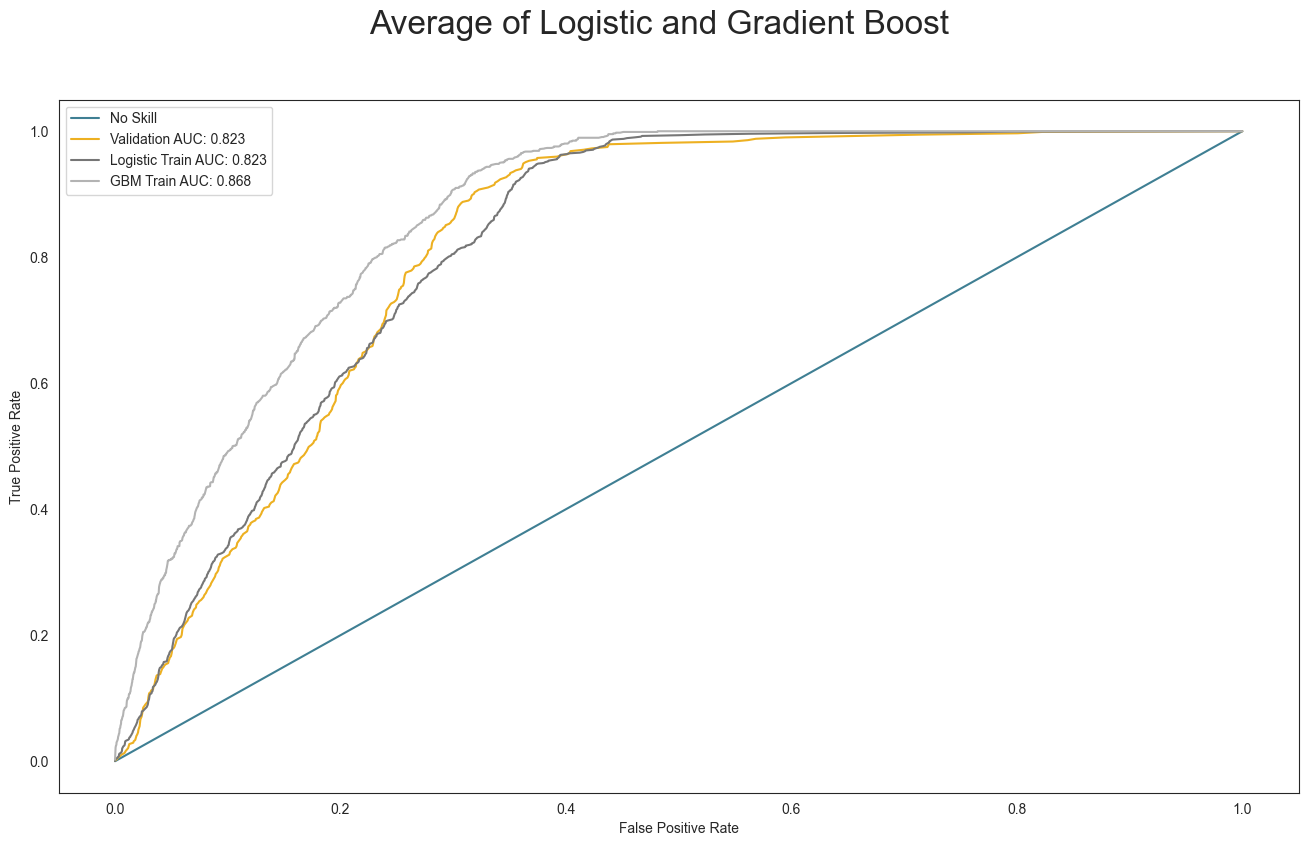

In [56]:
#--------------------------------------------------------------------------------------------------
y_pred_proba = ave
y_pred = (y_pred_proba > THRESHOLD).astype(int)
cm = confusion_matrix(y_val, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=logreg.classes_)

fig = sns.heatmap(cm_norm, annot=True, cbar=False, cmap='Blues', annot_kws={"fontsize":16})
fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix when Threshold = ' + str(THRESHOLD*100) + '%')
fig.set_ylim([0,2])

plt.savefig('temp.png', transparent=True, dpi=600)
plt.show()

#--------------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(16,9))
fig = sns.lineplot([0,1], [0,1], label='No Skill', color='#3f7f93')

#--------------------------------------------------------------------------------------------------
# Test performance
y_pred =ave
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

auc = roc_auc_score(y_val, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Validation AUC: {round(auc,3)}', ci=None, color='#edb021')

# Train performance
y_pred = logreg.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

auc = roc_auc_score(y_train, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Logistic Train AUC: {round(auc,3)}', ci=None, color='#767676')

# Train performance
y_pred = grad_boost_GS.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

auc = roc_auc_score(y_train, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'GBM Train AUC: {round(auc,3)}', ci=None, color='#b3b3b3')
#--------------------------------------------------------------------------------------------------
plt.legend()
fig.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
plt.suptitle('Average of Logistic and Gradient Boost', fontsize = 24)
plt.savefig('temp.png', transparent=True)
plt.show() 

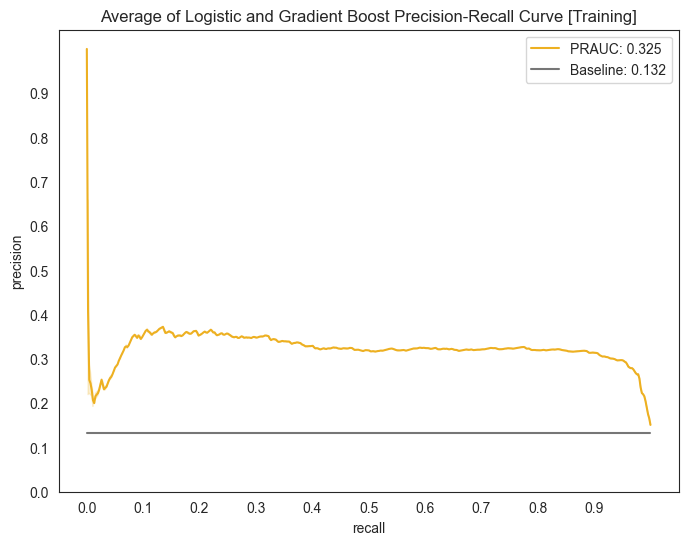

In [58]:
y_pred_proba = ave
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)
average_precision = average_precision_score(y_val, y_pred_proba)

plt.figure(figsize = (8,6))
sns.lineplot(x=recall, y=precision,
             label = 'PRAUC: %0.3f' % average_precision, color='#edb021')
baseline = len(y_val[y_test==1]) / len(y_val)
sns.lineplot(x=[0,1], y=[baseline, baseline], label = f'Baseline: {round(baseline, 3)}', color='#767676')
plt.legend(loc = 'upper right')
plt.xlabel('recall')
plt.ylabel('precision')
plt.yticks(np.arange(0, 1, step=0.1))
plt.xticks(np.arange(0, 1, step=0.1))
plt.title(f'Average of Logistic and Gradient Boost Precision-Recall Curve [Training]')
plt.show()

<br>

<br>

# Part 2: Mystery

### One Hot

In [27]:
train2_df = train_df_raw.copy()

# Make male = 1 female = 0 
train2_df['Gender'] = train2_df['Gender'].apply(lambda x: 1 if (x == 'Male') else 0)

# Vehicle damage yes = 1 
train2_df['VehicleDamage'] = train2_df['VehicleDamage'].apply(lambda x: 1 if (x == 'Yes') else 0)

# Dummify Age.1 
train2_df = pd.get_dummies(train2_df, columns=['Age.1'])
train2_df = pd.get_dummies(train2_df, columns=['Region_Code'])
train2_df = pd.get_dummies(train2_df, columns=['Mystery'])

# Drop mystery 
train2_df = train2_df.drop('Unnamed: 0', axis=1)

train2_df

,id,Gender,Age,VehicleDamage,Premium,Vintage,Response,Age.1_1-2 Year,Age.1_< 1 Year,Age.1_> 2 Years,...,Mystery_M19,Mystery_M2,Mystery_M20,Mystery_M3,Mystery_M4,Mystery_M5,Mystery_M6,Mystery_M7,Mystery_M8,Mystery_M9
0,319654,1,22,1,29719,79,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,298528,0,40,1,29645,99,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,120858,1,25,1,35996,266,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,234326,0,25,0,56899,25,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,372307,0,70,0,47452,189,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,93671,1,28,1,2630,31,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
9996,366284,1,43,1,28945,66,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9997,369037,0,46,0,2630,286,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
9998,268384,0,21,0,23031,155,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


The Training Accuracy is:  1.0
The Testing Accuracy is:  0.8539393939393939
               precision    recall  f1-score   support

 Bad Response       0.98      0.63      0.77      2841
Good Response       0.29      0.92      0.44       459

     accuracy                           0.67      3300
    macro avg       0.63      0.78      0.60      3300
 weighted avg       0.88      0.67      0.72      3300



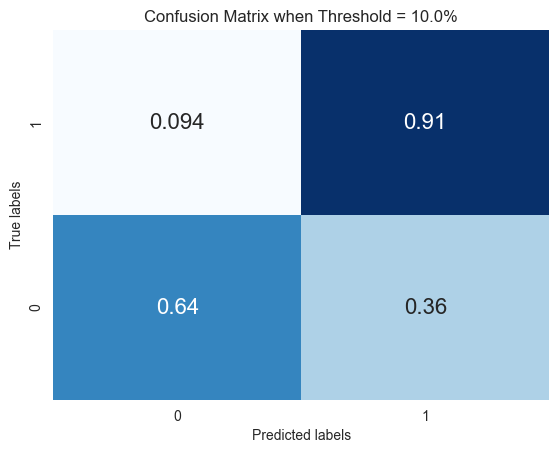

C:\Users\seanl\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


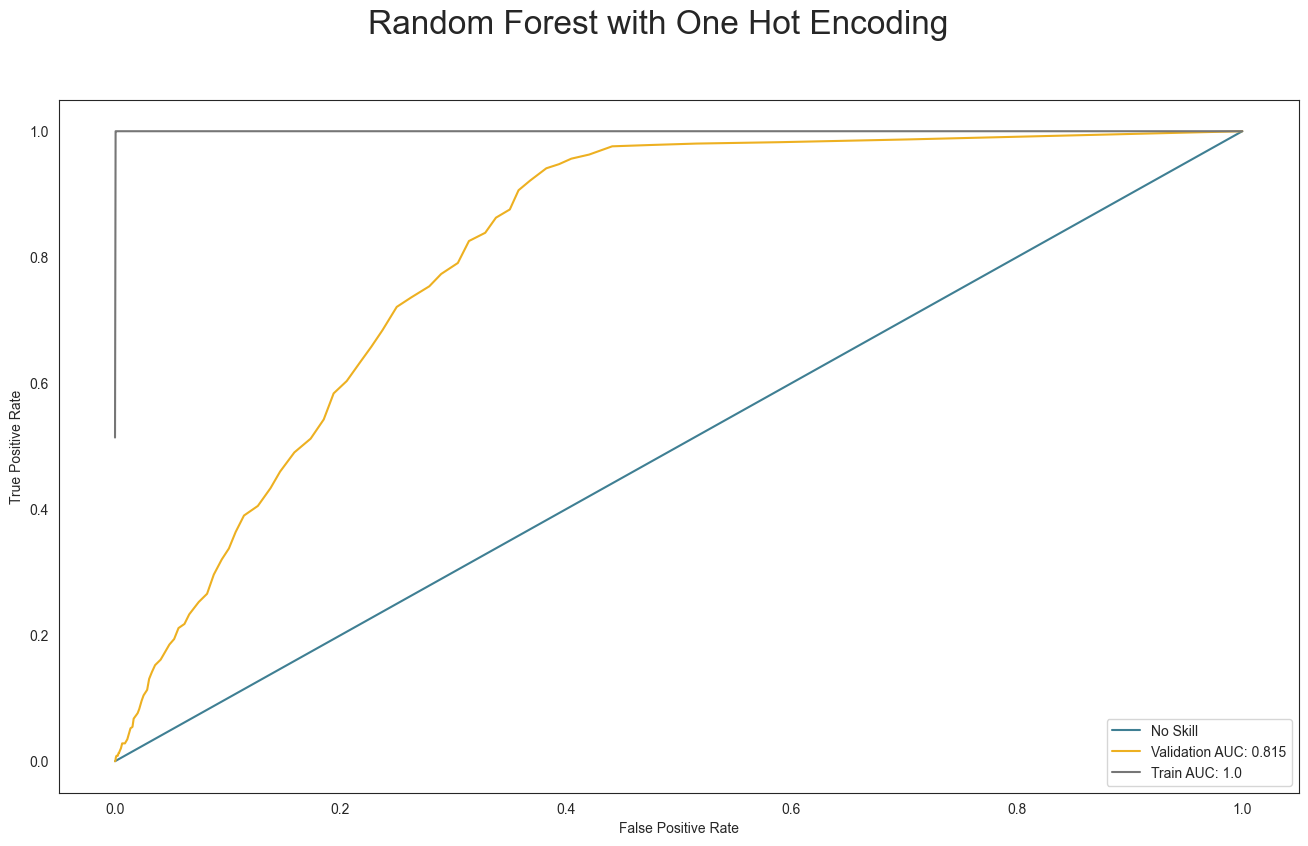

In [28]:
features = ['Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage', 'Response',
            'Age.1_1-2 Year', 'Age.1_< 1 Year', 'Age.1_> 2 Years','Region_Code_3',
            'Region_Code_8', 'Region_Code_11', 'Region_Code_15', 'Region_Code_28',
            'Region_Code_29', 'Region_Code_30', 'Region_Code_41', 'Region_Code_46',
            'Region_Code_50', 'Mystery_M1', 'Mystery_M10', 'Mystery_M11', 'Mystery_M12',
            'Mystery_M13', 'Mystery_M14', 'Mystery_M15', 'Mystery_M16', 'Mystery_M17',
            'Mystery_M18', 'Mystery_M19', 'Mystery_M2', 'Mystery_M20', 'Mystery_M3',
            'Mystery_M4','Mystery_M5', 'Mystery_M6', 'Mystery_M7', 'Mystery_M8', 'Mystery_M9']

X_train, X_val, y_train, y_val = data_generation(train2_df, features, 'Response')

#--------------------------------------------------------------------------------------------------
random_forest_one_hot = Pipeline(steps=[("scaler", StandardScaler()),
                        ("mdl", RandomForestClassifier())])

random_forest_one_hot.fit(X_train, y_train)

classification_stats(X_train, y_train, X_val, y_val, random_forest_one_hot, 'Random Forest with One Hot Encoding')

,features,values
4,Vintage,0.198265
1,Age,0.189576
3,Premium,0.185533
2,VehicleDamage,0.105957
0,Gender,0.028798
12,Region_Code_28,0.017078
6,Age.1_< 1 Year,0.014265
5,Age.1_1-2 Year,0.014037
25,Mystery_M16,0.011230
18,Mystery_M1,0.010624


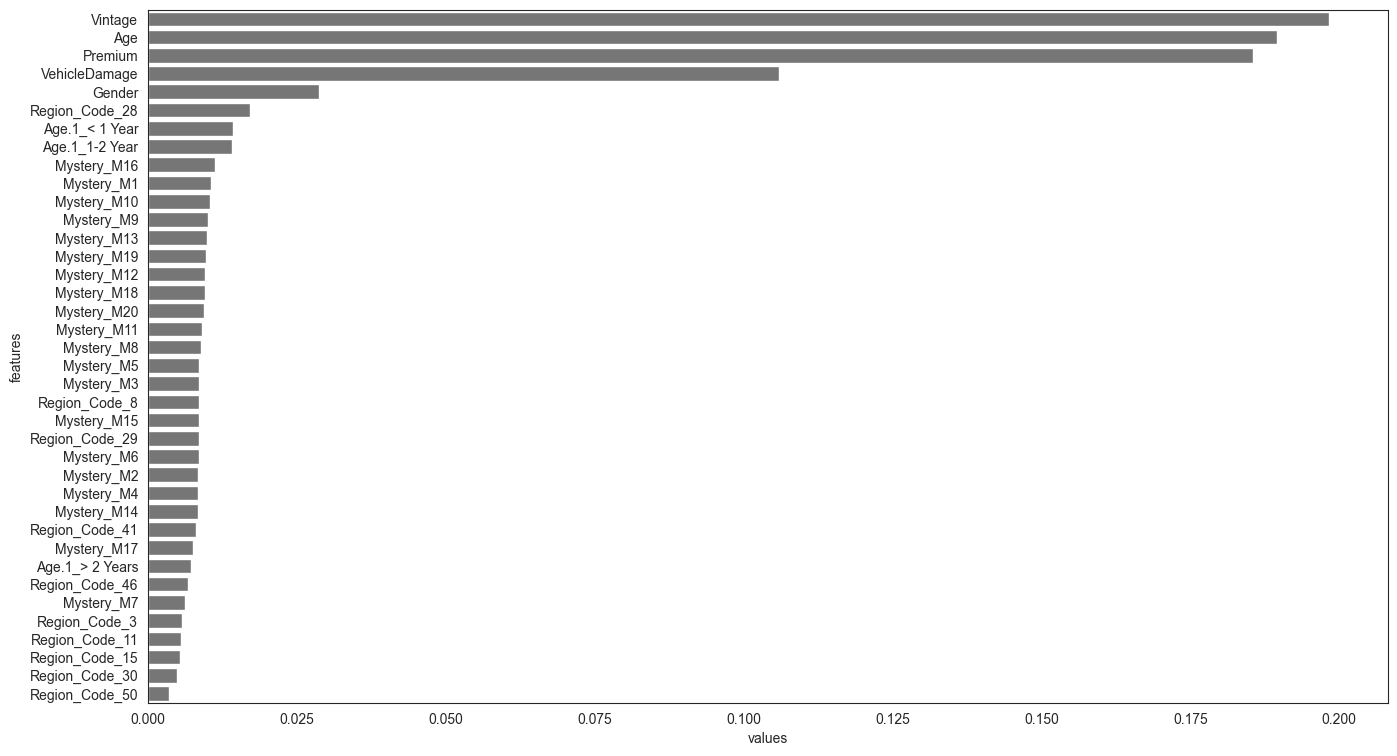

In [29]:
importance = random_forest_one_hot.named_steps["mdl"].feature_importances_
f = X_train.columns
temp = pd.DataFrame({'features':f, 'values':importance})
temp = temp.sort_values('values', ascending=False)


display(temp)

fig = plt.figure(figsize=(16,9))
sns.barplot(data=temp, x='values', y='features', color='#767676')
plt.show()

<br>

### Integer Encoding

In [30]:
train3_df = train_df_raw.copy()

# Make male = 1 female = 0 
train3_df['Gender'] = train3_df['Gender'].apply(lambda x: 1 if (x == 'Male') else 0)

# Vehicle damage yes = 1 
train3_df['VehicleDamage'] = train3_df['VehicleDamage'].apply(lambda x: 1 if (x == 'Yes') else 0)

# Dummify Age.1 
train3_df = pd.get_dummies(train3_df, columns=['Age.1'])
train3_df = pd.get_dummies(train3_df, columns=['Region_Code'])
train3_df['Mystery'] = train3_df['Mystery'].apply(lambda x: int(x[1:]))

# Drop mystery 
train3_df = train3_df.drop('Unnamed: 0', axis=1)

train3_df

,id,Gender,Age,VehicleDamage,Premium,Vintage,Response,Mystery,Age.1_1-2 Year,Age.1_< 1 Year,...,Region_Code_3,Region_Code_8,Region_Code_11,Region_Code_15,Region_Code_28,Region_Code_29,Region_Code_30,Region_Code_41,Region_Code_46,Region_Code_50
0,319654,1,22,1,29719,79,0,3,0,1,...,0,0,0,0,0,0,0,0,1,0
1,298528,0,40,1,29645,99,0,20,1,0,...,0,0,0,0,1,0,0,0,0,0
2,120858,1,25,1,35996,266,1,3,1,0,...,0,0,0,0,1,0,0,0,0,0
3,234326,0,25,0,56899,25,0,20,0,1,...,0,0,0,0,0,1,0,0,0,0
4,372307,0,70,0,47452,189,0,17,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,93671,1,28,1,2630,31,1,3,0,1,...,0,0,0,0,0,0,0,1,0,0
9996,366284,1,43,1,28945,66,0,13,0,0,...,0,0,0,0,0,0,0,0,1,0
9997,369037,0,46,0,2630,286,0,4,1,0,...,0,0,0,0,1,0,0,0,0,0
9998,268384,0,21,0,23031,155,0,16,0,1,...,0,0,0,0,0,0,1,0,0,0


In [31]:
train3_df.columns

Index(['id', 'Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage',
       'Response', 'Mystery', 'Age.1_1-2 Year', 'Age.1_< 1 Year',
       'Age.1_> 2 Years', 'Region_Code_3', 'Region_Code_8', 'Region_Code_11',
       'Region_Code_15', 'Region_Code_28', 'Region_Code_29', 'Region_Code_30',
       'Region_Code_41', 'Region_Code_46', 'Region_Code_50'],
      dtype='object')

The Training Accuracy is:  1.0
The Testing Accuracy is:  0.8560606060606061
               precision    recall  f1-score   support

 Bad Response       0.98      0.63      0.76      2841
Good Response       0.28      0.92      0.43       459

     accuracy                           0.67      3300
    macro avg       0.63      0.77      0.60      3300
 weighted avg       0.88      0.67      0.72      3300



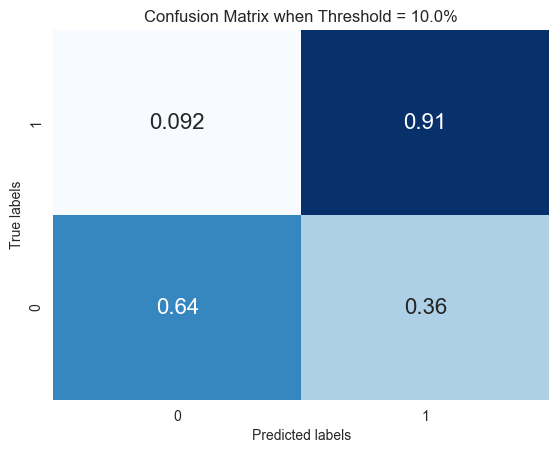

C:\Users\seanl\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


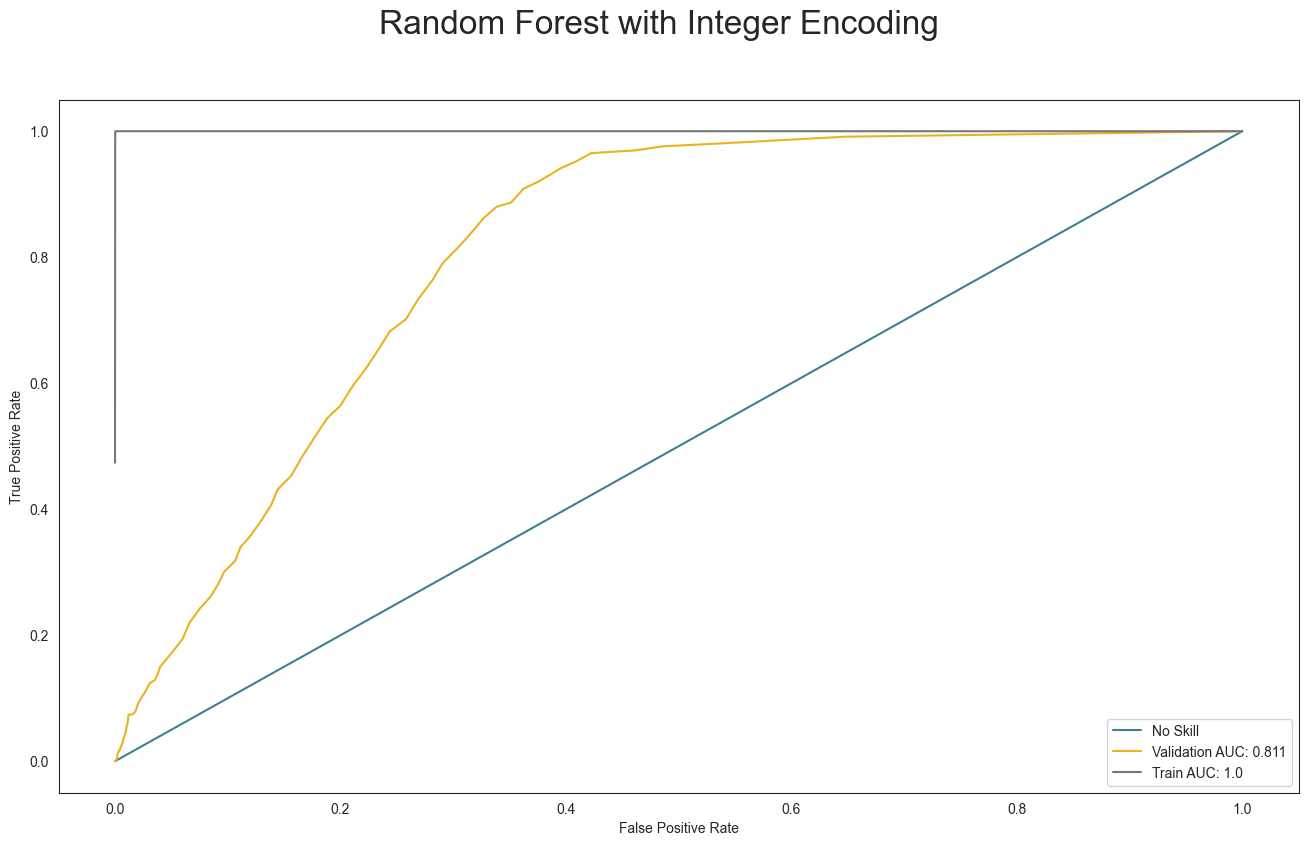

In [32]:
features = ['Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage',
            'Response', 'Mystery', 'Age.1_1-2 Year', 'Age.1_< 1 Year',
            'Age.1_> 2 Years', 'Region_Code_3', 'Region_Code_8', 'Region_Code_11',
            'Region_Code_15', 'Region_Code_28', 'Region_Code_29', 'Region_Code_30',
            'Region_Code_41', 'Region_Code_46', 'Region_Code_50']

X_train, X_val, y_train, y_val = data_generation(train3_df, features, 'Response')

#--------------------------------------------------------------------------------------------------
random_forest_integer = Pipeline(steps=[("scaler", StandardScaler()),
                        ("mdl", RandomForestClassifier())])

random_forest_integer.fit(X_train, y_train)

classification_stats(X_train, y_train, X_val, y_val, random_forest_integer, 'Random Forest with Integer Encoding')

,features,values
4,Vintage,0.220022
3,Premium,0.202556
1,Age,0.196716
5,Mystery,0.143267
2,VehicleDamage,0.112993
0,Gender,0.024179
13,Region_Code_28,0.015033
7,Age.1_< 1 Year,0.012155
6,Age.1_1-2 Year,0.012125
16,Region_Code_41,0.007754


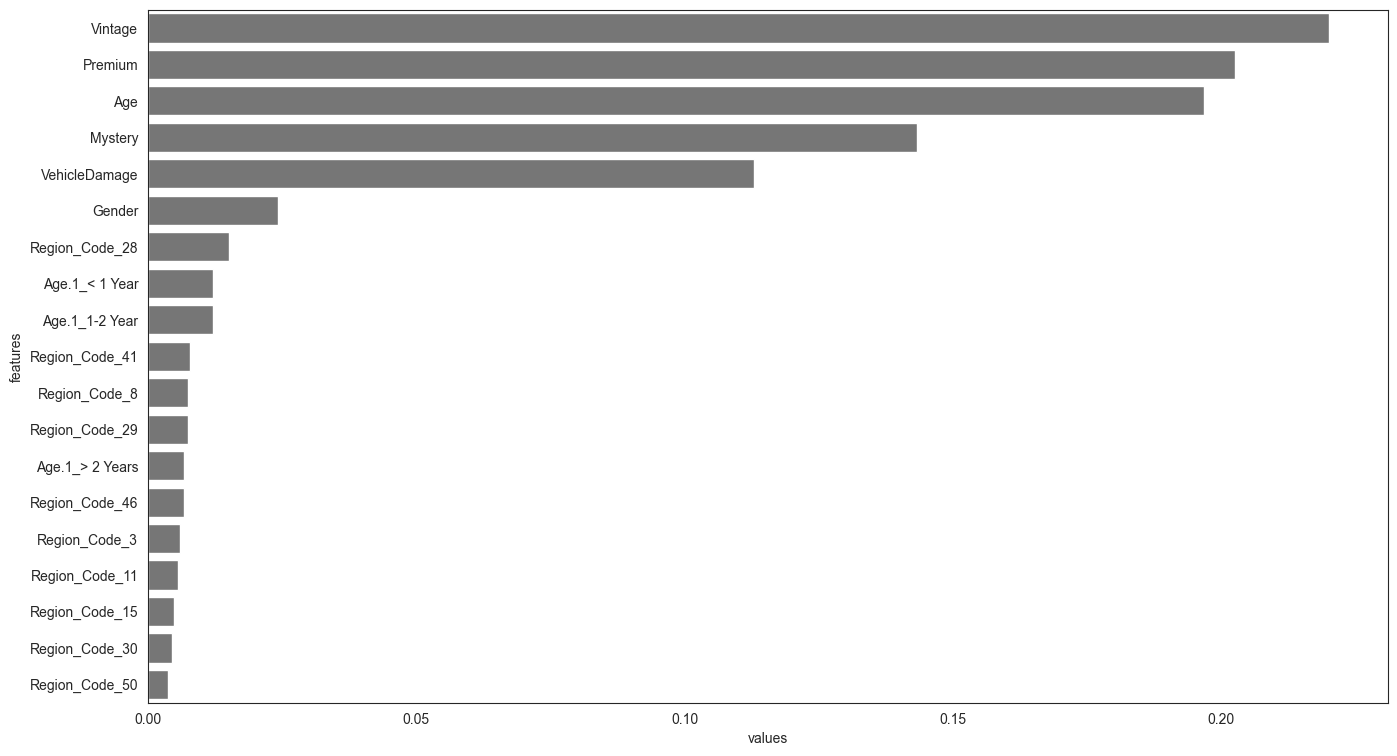

In [33]:
importance = random_forest_integer.named_steps["mdl"].feature_importances_
f = X_train.columns
temp = pd.DataFrame({'features':f, 'values':importance})
temp = temp.sort_values('values', ascending=False)


display(temp)

fig = plt.figure(figsize=(16,9))
sns.barplot(data=temp, x='values', y='features', color='#767676')
plt.show()

<br>

<br>

# Benefit Structure 

In [34]:
def findProbabilityThreshold(tp, fp, fn, tn, model, thresholds, X_train, y_train, X_test, y_test):
    confusion_matrices = []

    for i in range(0, len(thresholds)):
        threshold = thresholds[i]
        y_pred_proba = model.predict_proba(X_test)[:,1]
        y_pred = (y_pred_proba > threshold).astype(int)
        cm = confusion_matrix(y_test, y_pred)
        confusion_matrices.append(cm)
    
    benefits = []

    for j in range(0, len(thresholds)):
        cm = confusion_matrices[j]
        t_neg = cm[0, 0]
        f_pos = cm[0, 1]
        f_neg = cm[1, 0]
        t_pos = cm[1, 1]
        total = t_neg + f_pos + f_neg + t_pos

        cost_of_tp = tp
        cost_of_fn = fn
        cost_of_fp = fp
        cost_of_tn = tn

        benefit = (t_pos * cost_of_tp
                   + f_neg * cost_of_fn
                   + f_pos * cost_of_fp
                   + (t_pos + f_pos) * cost_of_tn)
        benefits.append(benefit)

    print("Probability Thresholds: ")
    print(thresholds)
    print("Benefits for each probability threshold: ")
    print(benefits)
    
    print("\nBest Probability Threshold & Benefit for " + type(model).__name__ + ":")

    print("Probability Threshold: " + str(thresholds[np.argmax(benefits)] * 100) + "%")
    print("Benefit: " + str(np.max(benefits)))
    
    return thresholds[np.argmax(benefits)]

### Part 1: 
- Promote to an interested customer + 10
- Miss an interested customer - 10
- Promote to an uninterested customer - 2
- Each promotion - 1


In this case we are focusing on **TP** (promote to interested customer) and **FN** (miss an interested customer). We also dont really case as much about promoting to an uninterested customer **(FP)** and the costs of each promotion **(TN)**. 

Probability Thresholds: 
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
Benefits for each probability threshold: 
[-4392, 165, 198, 198, 198, 198, 198, 198, 198, 204, 258, 273, 291, 307, 271, 339, 320, 226, 102, -23, -253, -351, -524, -706, -952, -1201, -1322, -1539, -1857, -2152, -2451, -2809, -3212, -3471, -3736, -3893, -4187, -4319, -4421, -4524, -4516, -4549, -4572, -4592, -4611, -4605, -4602, -4599, -4593, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -459

(0.0, 2.0)

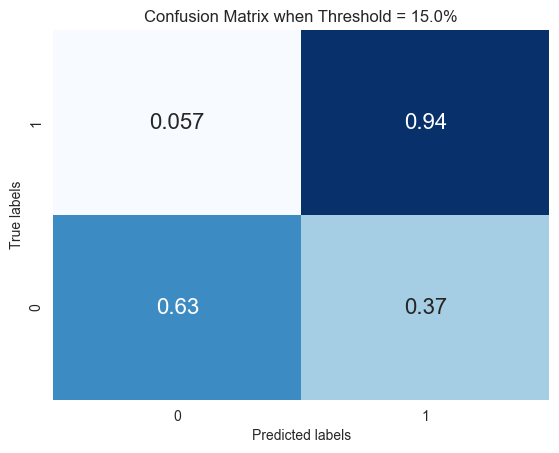

In [35]:
features = ['Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage',
            'Response', 'Age.1_1-2 Year', 'Age.1_< 1 Year', 'Age.1_> 2 Years', 'Region_Code_3',
            'Region_Code_8', 'Region_Code_11', 'Region_Code_15', 'Region_Code_28', 'Region_Code_29',
            'Region_Code_30', 'Region_Code_41', 'Region_Code_46', 'Region_Code_50']

X_train, X_val, y_train, y_val = data_generation(train_df, features, 'Response')
#--------------------------------------------------------------------------------------------------

thresholds = np.arange(0.0, 1.0, 0.01)

best_threshold = findProbabilityThreshold(10, -2, -10, -1,
                                          logreg,
                                          thresholds, 
                                          X_train, y_train,
                                         X_val, y_val)

y_pred_proba = logreg.predict_proba(X_train)[:,1]
y_pred = (y_pred_proba > best_threshold).astype(int)
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=logreg.classes_)

fig = sns.heatmap(cm_norm, annot=True, cbar=False, cmap='Blues', annot_kws={"fontsize":16})
fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix when Threshold = ' + str(best_threshold*100) + '%')
fig.set_ylim([0,2])

### Part 2:
- Promote to an interested customer + 100
- Miss an interested customer - 100
- Promote to an uninterested customer - 2
- Each promotion - 1


In this case we are very focused on **TP** (promote to interested customer) and **FN** (miss an interested customer). We also dont really care at all about promoting to an uninterested customer **(FP)** and the costs of each promotion **(TN)**. 

Probability Thresholds: 
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
Benefits for each probability threshold: 
[36918, 39855, 39888, 39888, 39888, 39888, 39888, 39888, 39888, 39894, 39948, 39423, 38901, 38017, 36361, 36249, 35510, 33616, 31152, 28507, 24137, 21519, 18286, 15044, 11018, 6989, 4528, 891, -3747, -8542, -13521, -19459, -25442, -29661, -33346, -35843, -39377, -41129, -42851, -44214, -44386, -44959, -45342, -45722, -45921, -45915, -45912, -45909, -45903, -45900, -45900, -45900, -45900, -45900, -45900, -45900, -45900, -

(0.0, 2.0)

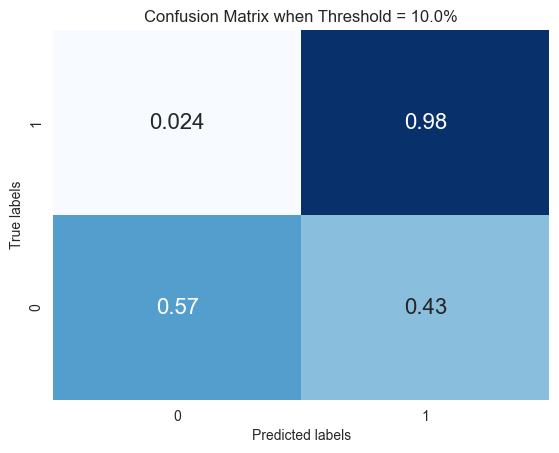

In [36]:
thresholds = np.arange(0.0, 1.0, 0.01)

best_threshold = findProbabilityThreshold(100, -2, -100, -1,
                                          logreg,
                                          thresholds,
                                          X_train, y_train,
                                         X_val, y_val)

y_pred_proba = logreg.predict_proba(X_train)[:,1]
y_pred = (y_pred_proba > best_threshold).astype(int)
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=logreg.classes_)

fig = sns.heatmap(cm_norm, annot=True, cbar=False, cmap='Blues', annot_kws={"fontsize":16})
fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix when Threshold = ' + str(best_threshold*100) + '%')
fig.set_ylim([0,2])

## Taking a look at a bunch of thresholds 

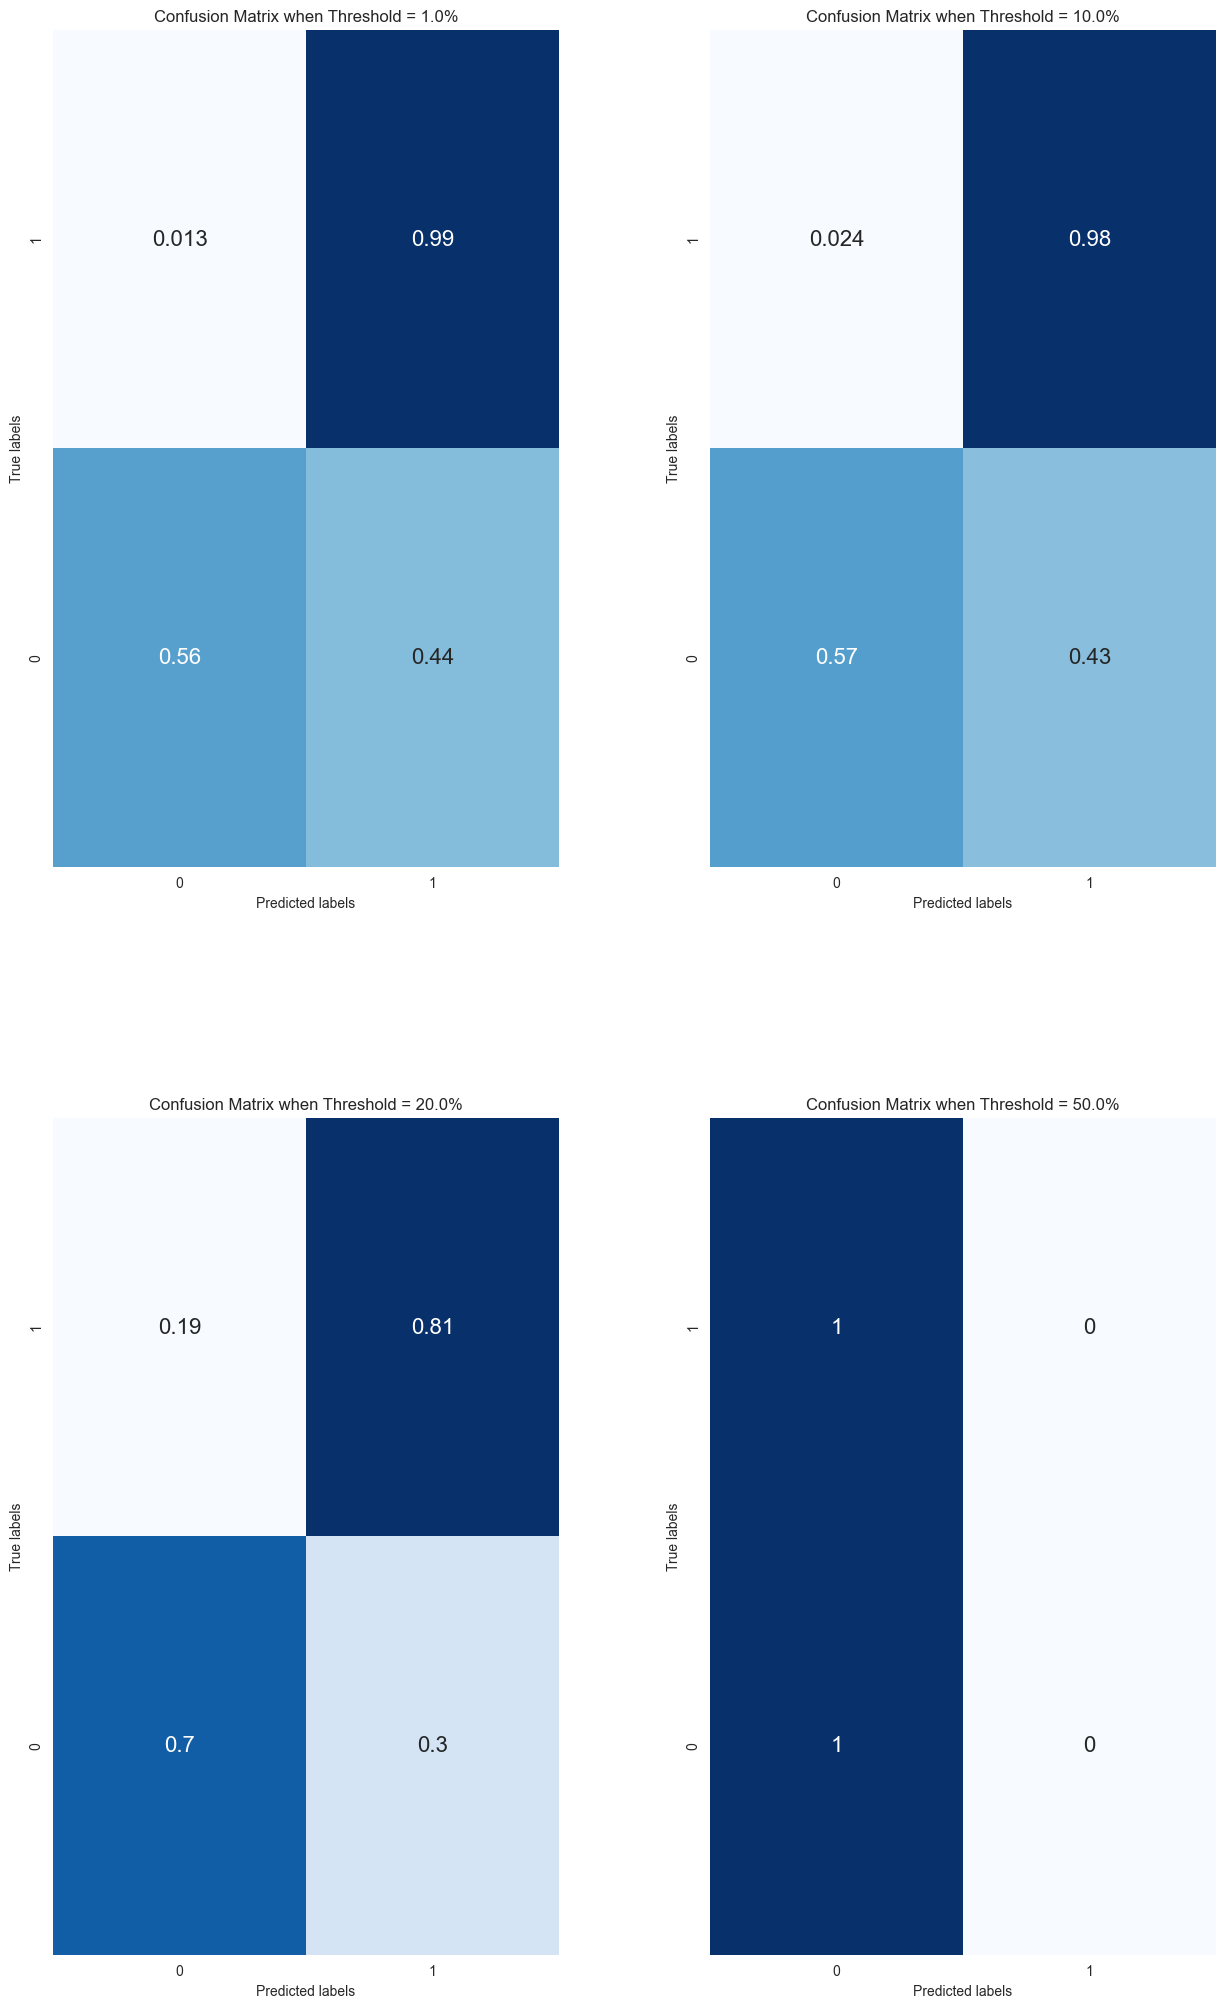

In [37]:
thresholds = [.01, .1, .2, .5]
confusion_matrices = []
fig, axes = plt.subplots(figsize=(15,25))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

for i in range(1, 5):
    ax = plt.subplot(2, 2, i)
    threshold = thresholds[i-1]
    y_pred_proba = logreg.predict_proba(X_train)[:,1]
    y_pred = (y_pred_proba > threshold).astype(int)
    cm = confusion_matrix(y_train, y_pred)
    cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=logreg.classes_)
    confusion_matrices.append(disp)

    sns.heatmap(cm_norm, annot=True, cbar=False, cmap='Blues', annot_kws={"fontsize":16})
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix when Threshold = ' + str(threshold*100) + '%');
    ax.set_ylim([0,2])


plt.show()

<br>

<br>

# Using Test Set 

In [38]:
display(test_df.head())

y_test = test_df['Response']
X_test = test_df.drop('Response', axis=1)
X_test = X_test.drop('id', axis=1)


,id,Gender,Age,VehicleDamage,Premium,Vintage,Response,Age.1_1-2 Year,Age.1_< 1 Year,Age.1_> 2 Years,Region_Code_3,Region_Code_8,Region_Code_11,Region_Code_15,Region_Code_28,Region_Code_29,Region_Code_30,Region_Code_41,Region_Code_46,Region_Code_50
0,121588,0,24,1,2630,271,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,44234,1,23,1,40523,244,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,65903,1,51,1,40951,33,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,264705,0,31,1,42505,191,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,364309,1,51,1,38232,151,1,1,0,0,0,0,0,0,0,0,0,0,1,0


# Logistic 

The Training Accuracy is:  0.8705970149253731
The Testing Accuracy is:  0.8636
               precision    recall  f1-score   support

 Bad Response       0.99      0.56      0.72      8636
Good Response       0.26      0.97      0.41      1364

     accuracy                           0.62     10000
    macro avg       0.63      0.77      0.56     10000
 weighted avg       0.89      0.62      0.67     10000



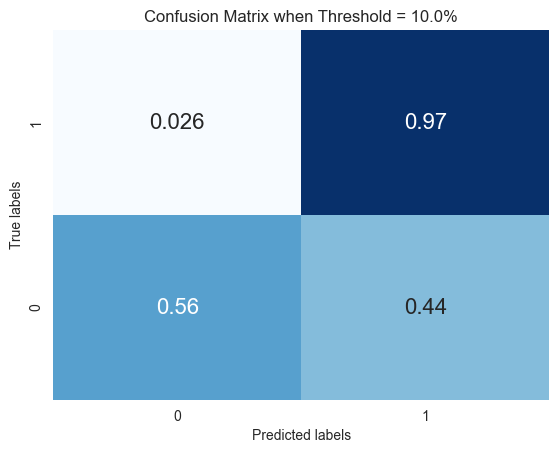

C:\Users\seanl\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


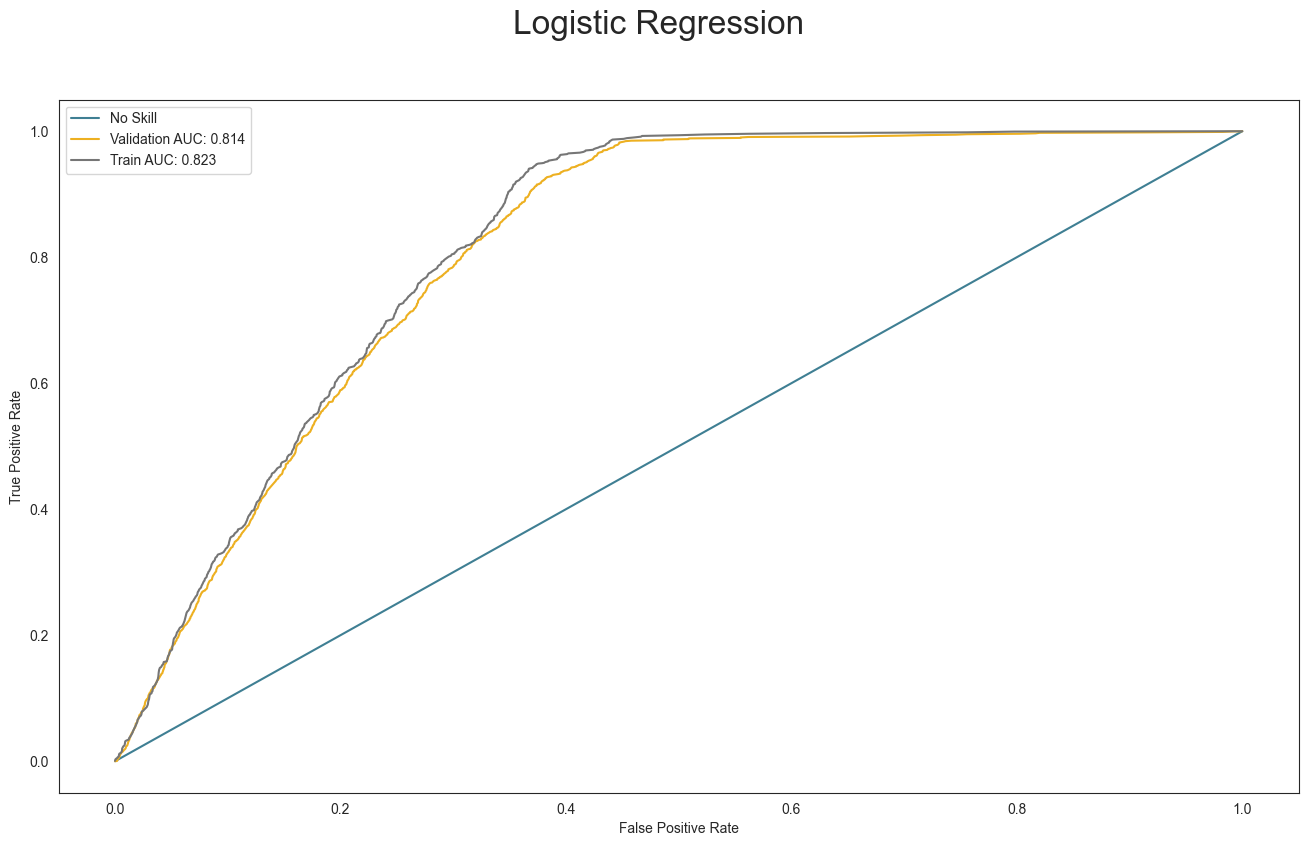

CPU times: total: 1.23 s
Wall time: 1.25 s


In [39]:
%%time
classification_stats(X_train, y_train, X_test, y_test, logreg, 'Logistic Regression')

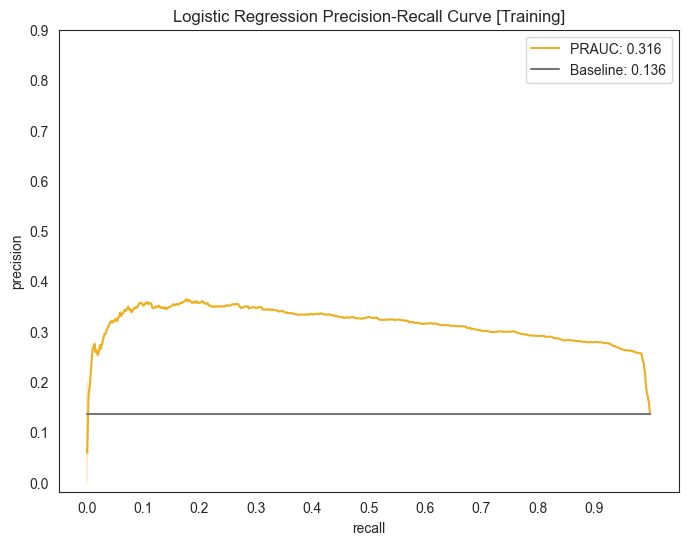

In [40]:
PRAUC_generator(X_train, y_train, X_test, y_test, logreg, 'Logistic Regression')